# Importação de bibliotecas

In [1]:
# !pip install pandas --upgrade
# !pip install numpy --upgrade

import numpy as np
import pandas as pd
from IPython.display import display

## Importação do dataset (walmart-recruiting-store-sales-forecasting)

In [2]:
import pandas as pd

# Definir o caminho base para os datasets raw no GitHub
github_base_url = 'https://raw.githubusercontent.com/gustavolima007/demand-predictor-walmart-MLOps/main/data/walmart-recruiting-store-sales-forecasting/'

# Lista para armazenar os dataframes
dfs = {}

# Nomes dos arquivos CSV a serem importados
csv_files = [
    'features.csv',
    'sampleSubmission.csv',
    'stores.csv',
    'test.csv',
    'train.csv'
]

# Importar cada arquivo CSV do GitHub
for file_name in csv_files:
    file_url = github_base_url + file_name
    df_name = file_name.replace('.csv', '') # Nome do dataframe será o nome do arquivo sem a extensão
    try:
        dfs[df_name] = pd.read_csv(file_url)
        print(f"Arquivo {file_name} importado como dataframe '{df_name}' do GitHub.")
    except Exception as e:
        print(f"Erro ao importar o arquivo {file_name} do GitHub: {e}")

# Agora, acesse e exiba as 5 primeiras linhas de cada dataframe
print("\nExibindo as 5 primeiras linhas de cada dataframe:")

# Acesse o dataframe 'stores' e exiba as 5 primeiras linhas
df_stores = dfs.get('stores')
if df_stores is not None:
    print("\nExibindo dataframe 'df_stores':")
    display(df_stores.head())

# Acesse o dataframe 'train' e exiba as 5 primeiras linhas
df_train = dfs.get('train')
if df_train is not None:
    print("\nExibindo dataframe 'df_train':")
    display(df_train.head())

# Acesse o dataframe 'test' e exiba as 5 primeiras linhas
df_test = dfs.get('test')
if df_test is not None:
    print("\nExibindo dataframe 'df_test':")
    display(df_test.head())

# Acesse o dataframe 'sampleSubmission' e exiba as 5 primeiras linhas
df_sampleSubmission = dfs.get('sampleSubmission')
if df_sampleSubmission is not None:
    print("\nExibindo dataframe 'df_sampleSubmission':")
    display(df_sampleSubmission.head())

# Acesse o dataframe 'features' e exiba as 5 primeiras linhas
df_features = dfs.get('features')
if df_features is not None:
    print("\nExibindo dataframe 'df_features':")
    display(df_features.head())

Arquivo features.csv importado como dataframe 'features' do GitHub.
Arquivo sampleSubmission.csv importado como dataframe 'sampleSubmission' do GitHub.
Arquivo stores.csv importado como dataframe 'stores' do GitHub.
Arquivo test.csv importado como dataframe 'test' do GitHub.
Arquivo train.csv importado como dataframe 'train' do GitHub.

Exibindo as 5 primeiras linhas de cada dataframe:

Exibindo dataframe 'df_stores':


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875



Exibindo dataframe 'df_train':


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False



Exibindo dataframe 'df_test':


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False



Exibindo dataframe 'df_sampleSubmission':


,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0



Exibindo dataframe 'df_features':


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## Unificação dos Dados (Merge)

In [3]:
import pandas as pd

# 1. Mesclar df_train com df_stores com base na coluna 'Store'
df_train_stores = pd.merge(df_train, df_stores, on='Store', how='left')

# 2. Mesclar o resultado com df_features com base em 'Store' e 'Date'
df_train_merged = pd.merge(df_train_stores, df_features, on=['Store', 'Date'], how='left')

# 3. Verificar o resultado
print("\nShape de df_train_merged:", df_train_merged.shape)
print("\nExibindo as 5 primeiras linhas do dataframe df_train_merged:")
display(df_train_merged.head())

# 4. Verificar se há valores ausentes
print("\nValores ausentes por coluna:")
print(df_train_merged.isnull().sum())


Shape de df_train_merged: (421570, 17)

Exibindo as 5 primeiras linhas do dataframe df_train_merged:


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False



Valores ausentes por coluna:
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64


In [4]:
# Para o conjunto de teste
df_test_merged = pd.merge(df_test, df_stores, on='Store', how='left')
df_test_merged = pd.merge(df_test_merged, df_features, on=['Store', 'Date', 'IsHoliday'], how='left')

print("\nExibindo as 5 primeiras linhas do dataframe df_test_merged:")
display(df_test_merged.head())


Exibindo as 5 primeiras linhas do dataframe df_test_merged:


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


# Limpeza de Dados

Visualização dos dataframe

In [5]:
print("Informações sobre df_train_merged:")
df_train_merged.info()

print("\nInformações sobre df_test_merged:")
df_test_merged.info()

Informações sobre df_train_merged:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), f

In [6]:
# Converter 'Date' para datetime
df_train_merged['Date'] = pd.to_datetime(df_train_merged['Date'])
df_test_merged['Date'] = pd.to_datetime(df_test_merged['Date'])

df_train_merged.info()
df_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [7]:
print("--- Estatísticas Descritivas: df_train_merged ---")
display(df_train_merged.describe(include='all'))

print("\n--- Estatísticas Descritivas: df_test_merged ---")
display(df_test_merged.describe(include='all'))

--- Estatísticas Descritivas: df_train_merged ---


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
count,421570.000000,421570.000000,421570,421570.000000,421570,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570
unique,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,False,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,391909,215478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391909
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,NaN,NaN,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,NaN
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,NaN,NaN,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,NaN
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,NaN,NaN,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,NaN
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,NaN,NaN,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,NaN
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,NaN,NaN,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,NaN
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,NaN,NaN,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,NaN



--- Estatísticas Descritivas: df_test_merged ---


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,115064.000000,115064.000000,115064,115064,115064,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000
unique,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,False,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,106136,58713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.238207,44.339524,2013-03-14 14:39:41.311270144,NaN,NaN,136497.688921,53.941804,3.581546,7689.216439,3734.051729,2403.088666,3356.219071,3922.681189,176.961347,6.868733
min,1.000000,1.000000,2012-11-02 00:00:00,NaN,NaN,34875.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000
25%,11.000000,18.000000,2013-01-04 00:00:00,NaN,NaN,93638.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000
50%,22.000000,37.000000,2013-03-15 00:00:00,NaN,NaN,140167.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000
75%,33.000000,74.000000,2013-05-24 00:00:00,NaN,NaN,202505.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000
max,45.000000,99.000000,2013-07-26 00:00:00,NaN,NaN,219622.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000


## Tratamento de Weekly_Sales Negativas e Colunas MarkDown

In [8]:
num_vendas_negativas = (df_train_merged['Weekly_Sales'] < 0).sum()
print(f"Número de Weekly_Sales negativas: {num_vendas_negativas}")
if num_vendas_negativas > 0:
    print("Substituindo Weekly_Sales negativas por 0...")
    df_train_merged.loc[df_train_merged['Weekly_Sales'] < 0, 'Weekly_Sales'] = 0
    print(f"Verificação - Novo mínimo de Weekly_Sales: {df_train_merged['Weekly_Sales'].min()}")
else:
    print("Nenhuma Weekly_Sales negativa encontrada.")

Número de Weekly_Sales negativas: 1285
Substituindo Weekly_Sales negativas por 0...
Verificação - Novo mínimo de Weekly_Sales: 0.0


In [9]:
# 1. Tratamento de Weekly_Sales negativas em df_train_merged
print("--- Tratando Weekly_Sales negativas em df_train_merged ---")
num_vendas_negativas = (df_train_merged['Weekly_Sales'] < 0).sum()
if num_vendas_negativas > 0:
    print(f"Encontradas {num_vendas_negativas} Weekly_Sales negativas. Substituindo por 0...")
    df_train_merged.loc[df_train_merged['Weekly_Sales'] < 0, 'Weekly_Sales'] = 0
    print(f"Verificação - Novo mínimo de Weekly_Sales: {df_train_merged['Weekly_Sales'].min()}")
else:
    print("Nenhuma Weekly_Sales negativa encontrada em df_train_merged.")

# 2. Tratamento de MarkDowns negativos

markdown_cols_to_check = ['MarkDown2', 'MarkDown3']

# Tratamento para df_train_merged
print("\n--- Tratando MarkDowns negativos em df_train_merged ---")
for col in markdown_cols_to_check:
    if col in df_train_merged.columns:
        num_neg_markdown_train = (df_train_merged[col] < 0).sum()
        if num_neg_markdown_train > 0:
            print(f"Encontrados {num_neg_markdown_train} valores negativos em {col}. Substituindo por 0...")
            df_train_merged.loc[df_train_merged[col] < 0, col] = 0
            print(f"Verificação - Novo mínimo de {col}: {df_train_merged[col].min()}")
        else:
            print(f"Nenhum valor negativo encontrado em {col} no df_train_merged.")
    else:
        print(f"Coluna {col} não encontrada em df_train_merged.")

# Tratamento para df_test_merged
print("\n--- Tratando MarkDowns negativos em df_test_merged ---")
for col in markdown_cols_to_check:
    if col in df_test_merged.columns:
        num_neg_markdown_test = (df_test_merged[col] < 0).sum()
        if num_neg_markdown_test > 0:
            print(f"Encontrados {num_neg_markdown_test} valores negativos em {col}. Substituindo por 0...")
            df_test_merged.loc[df_test_merged[col] < 0, col] = 0
            print(f"Verificação - Novo mínimo de {col}: {df_test_merged[col].min()}")
        else:
            print(f"Nenhum valor negativo encontrado em {col} no df_test_merged.")
    else:
        print(f"Coluna {col} não encontrada em df_test_merged.")

print("\nTratamento de valores negativos concluído!")

--- Tratando Weekly_Sales negativas em df_train_merged ---
Nenhuma Weekly_Sales negativa encontrada em df_train_merged.

--- Tratando MarkDowns negativos em df_train_merged ---
Encontrados 1311 valores negativos em MarkDown2. Substituindo por 0...
Verificação - Novo mínimo de MarkDown2: 0.0
Encontrados 257 valores negativos em MarkDown3. Substituindo por 0...
Verificação - Novo mínimo de MarkDown3: 0.0

--- Tratando MarkDowns negativos em df_test_merged ---
Encontrados 412 valores negativos em MarkDown2. Substituindo por 0...
Verificação - Novo mínimo de MarkDown2: 0.0
Encontrados 589 valores negativos em MarkDown3. Substituindo por 0...
Verificação - Novo mínimo de MarkDown3: 0.0

Tratamento de valores negativos concluído!


In [10]:
 # Validando valores negaticos:

for i in range(1, 6):
    col_name = f'MarkDown{i}'
    print(f"\nAnálise de {col_name} em df_train_merged:")
    print(f"Número de valores negativos: {(df_train_merged[col_name] < 0).sum()}")
    print(df_train_merged[df_train_merged[col_name] < 0][col_name].describe())


Análise de MarkDown1 em df_train_merged:
Número de valores negativos: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown1, dtype: float64

Análise de MarkDown2 em df_train_merged:
Número de valores negativos: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown2, dtype: float64

Análise de MarkDown3 em df_train_merged:
Número de valores negativos: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown3, dtype: float64

Análise de MarkDown4 em df_train_merged:
Número de valores negativos: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown4, dtype: float64

Análise de MarkDown5 em df_train_merged:
Número de valores negativos: 0
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN


## Verificação de Duplicatas

In [11]:
# Para df_train_merged
num_duplicatas_treino = df_train_merged.duplicated().sum()
print(f"\nNúmero de linhas duplicadas em df_train_merged: {num_duplicatas_treino}")
if num_duplicatas_treino > 0:
    print(f"Removendo {num_duplicatas_treino} linhas duplicadas de df_train_merged...")
    df_train_merged.drop_duplicates(inplace=True)
    df_train_merged.reset_index(drop=True, inplace=True) # Opcional: resetar o índice
    print(f"Novo shape de df_train_merged: {df_train_merged.shape}")

# Para df_test_merged
num_duplicatas_teste = df_test_merged.duplicated().sum()
print(f"\nNúmero de linhas duplicadas em df_test_merged: {num_duplicatas_teste}")
if num_duplicatas_teste > 0:
    print(f"Removendo {num_duplicatas_teste} linhas duplicadas de df_test_merged...")
    df_test_merged.drop_duplicates(inplace=True)
    df_test_merged.reset_index(drop=True, inplace=True) # Opcional: resetar o índice
    print(f"Novo shape de df_test_merged: {df_test_merged.shape}")


Número de linhas duplicadas em df_train_merged: 0

Número de linhas duplicadas em df_test_merged: 0


## Tratamento de Valores Ausentes (NaNs)

Verificando NaNs

In [12]:
print("--- Verificando NaNs em df_train_merged ANTES do tratamento ---")
print(df_train_merged.isnull().sum())

print("\n--- Verificando NaNs em df_test_merged ANTES do tratamento ---")
print(df_test_merged.isnull().sum())

--- Verificando NaNs em df_train_merged ANTES do tratamento ---
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

--- Verificando NaNs em df_test_merged ANTES do tratamento ---
Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


Tratamento de NaNs nas colunas MarkDown1 a MarkDown5

In [13]:
# 1. Tratamento de NaNs nas colunas MarkDown1 a MarkDown5
# Estratégia: Preencher NaNs com 0, pois indicam ausência de promoção.
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

print("\n--- Tratando NaNs nas colunas MarkDown (preenchendo com 0) ---")
for col in markdown_cols:
    if col in df_train_merged.columns:
        df_train_merged[col] = df_train_merged[col].fillna(0)
    if col in df_test_merged.columns:
        df_test_merged[col] = df_test_merged[col].fillna(0)
print("Preenchimento de NaNs nas colunas MarkDown concluído.")

# 2. Tratamento de NaNs nas colunas CPI e Unemployment
# Estratégia: Preenchimento progressivo (ffill) e depois regressivo (bfill), agrupado por 'Store'.
cols_to_ffill_bfill = ['CPI', 'Unemployment']

print("\n--- Tratando NaNs em CPI e Unemployment (ffill e bfill por Loja) ---")

# Para df_train_merged
print("Tratando df_train_merged para CPI e Unemployment...")
for col in cols_to_ffill_bfill:
    if col in df_train_merged.columns:
        # Agrupa por 'Store', aplica ffill e depois bfill dentro de cada grupo
        df_train_merged[col] = df_train_merged.groupby('Store')[col].ffill()
        df_train_merged[col] = df_train_merged.groupby('Store')[col].bfill()
    else:
        print(f"Coluna {col} não encontrada em df_train_merged.")

# Para df_test_merged
print("Tratando df_test_merged para CPI e Unemployment...")
for col in cols_to_ffill_bfill:
    if col in df_test_merged.columns:
        # Agrupa por 'Store', aplica ffill e depois bfill dentro de cada grupo
        df_test_merged[col] = df_test_merged.groupby('Store')[col].ffill()
        df_test_merged[col] = df_test_merged.groupby('Store')[col].bfill()
    else:
        print(f"Coluna {col} não encontrada em df_test_merged.")
print("Preenchimento de NaNs em CPI e Unemployment concluído.")

# 3. Verificação final de NaNs
print("\n--- Verificando NaNs em df_train_merged APÓS o tratamento ---")
print(df_train_merged.isnull().sum())

print("\n--- Verificando NaNs em df_test_merged APÓS o tratamento ---")
print(df_test_merged.isnull().sum())

print("\nTratamento de valores ausentes (NaNs) concluído!")


--- Tratando NaNs nas colunas MarkDown (preenchendo com 0) ---
Preenchimento de NaNs nas colunas MarkDown concluído.

--- Tratando NaNs em CPI e Unemployment (ffill e bfill por Loja) ---
Tratando df_train_merged para CPI e Unemployment...
Tratando df_test_merged para CPI e Unemployment...
Preenchimento de NaNs em CPI e Unemployment concluído.

--- Verificando NaNs em df_train_merged APÓS o tratamento ---
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64

--- Verificando NaNs em df_test_merged APÓS o tratamento ---
Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4   

## Transformação de Variáveis Categóricas (One-Hot Encoding)

### Alteração de colunas

In [14]:
print("--- Transformando a coluna 'Type' (One-Hot Encoding) ---")

# Aplicar em df_train_merged
df_train_merged = pd.get_dummies(df_train_merged, columns=['Type'], prefix='Type')
print("Coluna 'Type' transformada em df_train_merged.")
display(df_train_merged.head(2)) # Mostrar algumas linhas para ver as novas colunas

# Aplicar em df_test_merged
df_test_merged = pd.get_dummies(df_test_merged, columns=['Type'], prefix='Type')
print("\nColuna 'Type' transformada em df_test_merged.")
display(df_test_merged.head(2)) # Mostrar algumas linhas para ver as novas colunas

--- Transformando a coluna 'Type' (One-Hot Encoding) ---
Coluna 'Type' transformada em df_train_merged.


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,True,False,False
1,1,1,2010-02-12,46039.49,True,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,True,False,False



Coluna 'Type' transformada em df_test_merged.


,Store,Dept,Date,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C
0,1,1,2012-11-02,False,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,True,False,False
1,1,1,2012-11-09,False,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,True,False,False


Transformação da Variável Booleana

In [15]:
import pandas as pd

# 1. Mesclar df_train com df_stores com base na coluna 'Store'
df_train_stores = pd.merge(df_train, df_stores, on='Store', how='left')

# 2. Mesclar o resultado com df_features com base em 'Store' e 'Date'
df_train_merged = pd.merge(df_train_stores, df_features, on=['Store', 'Date'], how='left')

# 3. Verificar o resultado
print("\nShape de df_train_merged:", df_train_merged.shape)
print("\nExibindo as 5 primeiras linhas do dataframe df_train_merged:")
display(df_train_merged.head())

# 4. Verificar se há valores ausentes
print("\nValores ausentes por coluna:")
print(df_train_merged.isnull().sum())

# 5. Tratar a coluna 'IsHoliday'
print("\n--- Tratando a coluna 'IsHoliday' ---")

# Verificar se 'IsHoliday_x' e 'IsHoliday_y' são consistentes (opcional, para debugging)
if 'IsHoliday_x' in df_train_merged.columns and 'IsHoliday_y' in df_train_merged.columns:
    discrepancias = df_train_merged[df_train_merged['IsHoliday_x'] != df_train_merged['IsHoliday_y']]
    if not discrepancias.empty:
        print(f"ATENÇÃO: {len(discrepancias)} linhas com discrepâncias entre 'IsHoliday_x' e 'IsHoliday_y'.")
        print("Exemplo de discrepâncias:")
        display(discrepancias[['Date', 'IsHoliday_x', 'IsHoliday_y']].head())
    # Usar 'IsHoliday_x' como a fonte principal
    df_train_merged['IsHoliday'] = df_train_merged['IsHoliday_x']
else:
    print("Uma ou ambas as colunas 'IsHoliday_x' ou 'IsHoliday_y' não estão presentes.")

# 6. Transformar 'IsHoliday' para int (0/1)
df_train_merged['IsHoliday'] = df_train_merged['IsHoliday'].astype(int)
print("Coluna 'IsHoliday' transformada para int em df_train_merged.")

# 7. Repetir para df_test_merged
df_test_stores = pd.merge(df_test, df_stores, on='Store', how='left')
df_test_merged = pd.merge(df_test_stores, df_features, on=['Store', 'Date'], how='left')
df_test_merged['IsHoliday'] = df_test_merged['IsHoliday_x'].astype(int)
print("Coluna 'IsHoliday' transformada para int em df_test_merged.")

# 8. Exibir amostra para verificação
print("\nExibindo as 3 primeiras linhas de 'Date' e 'IsHoliday' em df_train_merged:")
display(df_train_merged[['Date', 'IsHoliday']].head(3))


Shape de df_train_merged: (421570, 17)

Exibindo as 5 primeiras linhas do dataframe df_train_merged:


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False



Valores ausentes por coluna:
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

--- Tratando a coluna 'IsHoliday' ---
Coluna 'IsHoliday' transformada para int em df_train_merged.
Coluna 'IsHoliday' transformada para int em df_test_merged.

Exibindo as 3 primeiras linhas de 'Date' e 'IsHoliday' em df_train_merged:


,Date,IsHoliday
0,2010-02-05,0
1,2010-02-12,1
2,2010-02-19,0


# Engenharia de Features



## Criação de Features Temporais

In [16]:
import pandas as pd

# 1. Verificar e converter 'Date' para datetime em df_train_merged
print("--- Verificando e convertendo 'Date' em df_train_merged ---")
if 'Date' not in df_train_merged.columns:
    print("ERRO: Coluna 'Date' não encontrada em df_train_merged.")
    print("Colunas disponíveis:", df_train_merged.columns.tolist())
else:
    if not pd.api.types.is_datetime64_any_dtype(df_train_merged['Date']):
        df_train_merged['Date'] = pd.to_datetime(df_train_merged['Date'], errors='coerce')
        print("Coluna 'Date' convertida para datetime em df_train_merged.")
    else:
        print("Coluna 'Date' já está em formato datetime em df_train_merged.")

# 2. Verificar e converter 'Date' para datetime em df_test_merged
print("\n--- Verificando e convertendo 'Date' em df_test_merged ---")
if 'Date' not in df_test_merged.columns:
    print("ERRO: Coluna 'Date' não encontrada em df_test_merged.")
    print("Colunas disponíveis:", df_test_merged.columns.tolist())
else:
    if not pd.api.types.is_datetime64_any_dtype(df_test_merged['Date']):
        df_test_merged['Date'] = pd.to_datetime(df_test_merged['Date'], errors='coerce')
        print("Coluna 'Date' convertida para datetime em df_test_merged.")
    else:
        print("Coluna 'Date' já está em formato datetime em df_test_merged.")

# 3. Função para criar features temporais
print("\n--- Atualizando a função para criar mais Features Temporais ---")

def criar_features_temporais_v2(df):
    df_copy = df.copy()

    # Features básicas
    df_copy['Year'] = df_copy['Date'].dt.year
    df_copy['Month'] = df_copy['Date'].dt.month
    df_copy['Day'] = df_copy['Date'].dt.day
    df_copy['WeekOfYear'] = df_copy['Date'].dt.isocalendar().week.astype(int)
    df_copy['DayOfWeek'] = df_copy['Date'].dt.dayofweek  # Segunda=0, Domingo=6
    df_copy['DayOfYear'] = df_copy['Date'].dt.dayofyear

    # Novas features
    df_copy['Quarter'] = df_copy['Date'].dt.quarter
    df_copy['IsMonthStart'] = df_copy['Date'].dt.is_month_start.astype(int)
    df_copy['IsMonthEnd'] = df_copy['Date'].dt.is_month_end.astype(int)
    df_copy['IsYearStart'] = df_copy['Date'].dt.is_year_start.astype(int)
    df_copy['IsYearEnd'] = df_copy['Date'].dt.is_year_end.astype(int)

    # Semana do Mês
    df_copy['WeekOfMonth'] = (df_copy['Date'].dt.day - 1) // 7 + 1

    return df_copy

# 4. Aplicar a função em df_train_merged
if 'Date' in df_train_merged.columns and pd.api.types.is_datetime64_any_dtype(df_train_merged['Date']):
    df_train_merged = criar_features_temporais_v2(df_train_merged)
    print("\nNovas features temporais adicionadas a df_train_merged.")
    cols_to_display = ['Date', 'Year', 'Month', 'Day', 'WeekOfYear', 'DayOfWeek', 'DayOfYear',
                       'Quarter', 'IsMonthStart', 'IsMonthEnd', 'IsYearStart', 'IsYearEnd', 'WeekOfMonth']
    cols_to_display = [col for col in cols_to_display if col in df_train_merged.columns]
    display(df_train_merged[cols_to_display].head())
else:
    print("ERRO: Coluna 'Date' não encontrada ou não é datetime em df_train_merged. Novas features temporais não criadas.")

# 5. Aplicar a função em df_test_merged
if 'Date' in df_test_merged.columns and pd.api.types.is_datetime64_any_dtype(df_test_merged['Date']):
    df_test_merged = criar_features_temporais_v2(df_test_merged)
    print("\nNovas features temporais adicionadas a df_test_merged.")
    cols_to_display_test = [col for col in cols_to_display if col in df_test_merged.columns]
    display(df_test_merged[cols_to_display_test].head())
else:
    print("ERRO: Coluna 'Date' não encontrada ou não é datetime em df_test_merged. Novas features temporais não criadas.")

--- Verificando e convertendo 'Date' em df_train_merged ---
Coluna 'Date' convertida para datetime em df_train_merged.

--- Verificando e convertendo 'Date' em df_test_merged ---
Coluna 'Date' convertida para datetime em df_test_merged.

--- Atualizando a função para criar mais Features Temporais ---

Novas features temporais adicionadas a df_train_merged.


,Date,Year,Month,Day,WeekOfYear,DayOfWeek,DayOfYear,Quarter,IsMonthStart,IsMonthEnd,IsYearStart,IsYearEnd,WeekOfMonth
0,2010-02-05,2010,2,5,5,4,36,1,0,0,0,0,1
1,2010-02-12,2010,2,12,6,4,43,1,0,0,0,0,2
2,2010-02-19,2010,2,19,7,4,50,1,0,0,0,0,3
3,2010-02-26,2010,2,26,8,4,57,1,0,0,0,0,4
4,2010-03-05,2010,3,5,9,4,64,1,0,0,0,0,1



Novas features temporais adicionadas a df_test_merged.


,Date,Year,Month,Day,WeekOfYear,DayOfWeek,DayOfYear,Quarter,IsMonthStart,IsMonthEnd,IsYearStart,IsYearEnd,WeekOfMonth
0,2012-11-02,2012,11,2,44,4,307,4,0,0,0,0,1
1,2012-11-09,2012,11,9,45,4,314,4,0,0,0,0,2
2,2012-11-16,2012,11,16,46,4,321,4,0,0,0,0,3
3,2012-11-23,2012,11,23,47,4,328,4,0,0,0,0,4
4,2012-11-30,2012,11,30,48,4,335,4,0,1,0,0,5


## Criação de Features de Lag (Defasagem)

In [17]:
print("--- Criando Features de Lag (com ajuste para FutureWarning) ---")

# 1. Preparar dataframes temporários para a criação de lags
# Selecionar colunas chave e a variável alvo (Weekly_Sales apenas do treino)
df_train_temp_for_lag = df_train_merged[['Store', 'Dept', 'Date', 'Weekly_Sales']].copy()
df_test_temp_for_lag = df_test_merged[['Store', 'Dept', 'Date']].copy()

# Adicionar coluna Weekly_Sales com np.nan para o teste (para consistência de tipo float)
df_test_temp_for_lag['Weekly_Sales'] = np.nan #

# Adicionar um identificador para separar depois
df_train_temp_for_lag['is_train'] = 1
df_test_temp_for_lag['is_train'] = 0

# 2. Concatenar os dataframes temporários
# Este é o ponto onde o FutureWarning ocorria. O ajuste acima com np.nan deve ajudar.
df_combined = pd.concat([df_train_temp_for_lag, df_test_temp_for_lag], ignore_index=True)

# 3. Ordenar corretamente ANTES de aplicar o shift dentro dos grupos
df_combined.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)

# 4. Definir os lags que queremos criar
lags_to_create = [1, 2, 3, 4, 12, 26, 52] # Ex: 1 semana, 2 sem, ..., 1 ano

for lag in lags_to_create:
    # O groupby garante que o shift é feito dentro de cada série individual de Loja/Departamento
    df_combined[f'Weekly_Sales_lag_{lag}'] = df_combined.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(lag)

print(f"Features de lag {lags_to_create} criadas no dataframe combinado.")

# 5. Separar de volta em treino e teste
df_train_with_lags = df_combined[df_combined['is_train'] == 1].copy()
df_test_with_lags = df_combined[df_combined['is_train'] == 0].copy()

# Remover colunas auxiliares
df_train_with_lags.drop(columns=['is_train'], inplace=True)
# Para o teste, remover também a coluna 'Weekly_Sales' que foi preenchida com np.nan
df_test_with_lags.drop(columns=['is_train', 'Weekly_Sales'], inplace=True)

# 6. Juntar as novas colunas de lag de volta aos dataframes originais
# Merge para df_train_merged (usando as colunas originais para garantir a junção correta)
df_train_merged = pd.merge(
    df_train_merged,
    df_train_with_lags, # Contém Store, Dept, Date, Weekly_Sales (original) e os lags
    on=['Store', 'Dept', 'Date', 'Weekly_Sales'], # Chaves para garantir correspondência exata
    how='left'
)

# Merge para df_test_merged
df_test_merged = pd.merge(
    df_test_merged,
    df_test_with_lags, # Contém Store, Dept, Date e os lags
    on=['Store', 'Dept', 'Date'], # Chaves para o teste
    how='left'
)

print("Features de lag adicionadas a df_train_merged e df_test_merged.")

# 7. Verificar as novas colunas e os NaNs introduzidos pelos lags (opcional, mas recomendado)
print("\nExemplo de features de lag em df_train_merged (Loja 1, Dept 1):")
cols_to_show_train = ['Date', 'Weekly_Sales'] + [col for col in df_train_merged.columns if 'Weekly_Sales_lag' in col]
# Filtrando para uma loja/departamento específico para facilitar a visualização dos lags
display(df_train_merged[(df_train_merged['Store']==1) & (df_train_merged['Dept']==1)][cols_to_show_train].head(10))

print("\nExemplo de features de lag em df_test_merged (Loja 1, Dept 1):")
cols_to_show_test = ['Date'] + [col for col in df_test_merged.columns if 'Weekly_Sales_lag' in col]
display(df_test_merged[(df_test_merged['Store']==1) & (df_test_merged['Dept']==1)][cols_to_show_test].head(10))

print("\nVerificando NaNs introduzidos pelos lags em df_train_merged:")
print(df_train_merged[[col for col in df_train_merged.columns if 'Weekly_Sales_lag' in col]].isnull().sum().sort_values(ascending=False))

print("\nVerificando NaNs introduzidos pelos lags em df_test_merged:")
print(df_test_merged[[col for col in df_test_merged.columns if 'Weekly_Sales_lag' in col]].isnull().sum().sort_values(ascending=False))

print("\nCriação de features de lag concluída!")

--- Criando Features de Lag (com ajuste para FutureWarning) ---
Features de lag [1, 2, 3, 4, 12, 26, 52] criadas no dataframe combinado.
Features de lag adicionadas a df_train_merged e df_test_merged.

Exemplo de features de lag em df_train_merged (Loja 1, Dept 1):


,Date,Weekly_Sales,Weekly_Sales_lag_1,Weekly_Sales_lag_2,Weekly_Sales_lag_3,Weekly_Sales_lag_4,Weekly_Sales_lag_12,Weekly_Sales_lag_26,Weekly_Sales_lag_52
0,2010-02-05,24924.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-12,46039.49,24924.50,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-02-19,41595.55,46039.49,24924.50,NaN,NaN,NaN,NaN,NaN
3,2010-02-26,19403.54,41595.55,46039.49,24924.50,NaN,NaN,NaN,NaN
4,2010-03-05,21827.90,19403.54,41595.55,46039.49,24924.50,NaN,NaN,NaN
5,2010-03-12,21043.39,21827.90,19403.54,41595.55,46039.49,NaN,NaN,NaN
6,2010-03-19,22136.64,21043.39,21827.90,19403.54,41595.55,NaN,NaN,NaN
7,2010-03-26,26229.21,22136.64,21043.39,21827.90,19403.54,NaN,NaN,NaN
8,2010-04-02,57258.43,26229.21,22136.64,21043.39,21827.90,NaN,NaN,NaN
9,2010-04-09,42960.91,57258.43,26229.21,22136.64,21043.39,NaN,NaN,NaN



Exemplo de features de lag em df_test_merged (Loja 1, Dept 1):


,Date,Weekly_Sales_lag_1,Weekly_Sales_lag_2,Weekly_Sales_lag_3,Weekly_Sales_lag_4,Weekly_Sales_lag_12,Weekly_Sales_lag_26,Weekly_Sales_lag_52
0,2012-11-02,27390.81,24185.27,22764.01,21904.47,16119.92,17147.44,39886.06
1,2012-11-09,NaN,27390.81,24185.27,22764.01,17330.70,18164.20,18689.54
2,2012-11-16,NaN,NaN,27390.81,24185.27,16286.40,18517.79,19050.66
3,2012-11-23,NaN,NaN,NaN,27390.81,16680.24,16963.55,20911.25
4,2012-11-30,NaN,NaN,NaN,NaN,18322.37,16065.49,25293.49
5,2012-12-07,NaN,NaN,NaN,NaN,19616.22,17666.00,33305.92
6,2012-12-14,NaN,NaN,NaN,NaN,19251.50,17558.82,45773.03
7,2012-12-21,NaN,NaN,NaN,NaN,18947.81,16633.41,46788.75
8,2012-12-28,NaN,NaN,NaN,NaN,21904.47,15722.82,23350.88
9,2013-01-04,NaN,NaN,NaN,NaN,22764.01,17823.37,16567.69



Verificando NaNs introduzidos pelos lags em df_train_merged:
Weekly_Sales_lag_52    160487
Weekly_Sales_lag_26     81918
Weekly_Sales_lag_12     38615
Weekly_Sales_lag_4      13134
Weekly_Sales_lag_3       9889
Weekly_Sales_lag_2       6625
Weekly_Sales_lag_1       3331
dtype: int64

Verificando NaNs introduzidos pelos lags em df_test_merged:
Weekly_Sales_lag_1     111906
Weekly_Sales_lag_2     108793
Weekly_Sales_lag_3     105706
Weekly_Sales_lag_4     102641
Weekly_Sales_lag_12     78564
Weekly_Sales_lag_26     37468
Weekly_Sales_lag_52      1346
dtype: int64

Criação de features de lag concluída!


## Criação de Features de Janela Móvel (Rolling Window)

In [18]:
# # Converter a coluna 'Date' para datetime, se ainda não estiver
# df_train['Date'] = pd.to_datetime(df_train['Date'])
# df_test['Date'] = pd.to_datetime(df_test['Date'])

# Definir a data de corte para a divisão treino/validação
train_end_date = '2012-07-31'
val_start_date = '2012-08-01'

# Dividir df_train em treino e validação com base na data
df_train_subset = df_train[df_train['Date'] <= train_end_date].copy()
df_val_subset = df_train[(df_train['Date'] >= val_start_date) & (df_train['Date'] <= '2012-10-26')].copy()

print(f"Treino: {df_train_subset['Date'].min()} a {df_train_subset['Date'].max()} ({len(df_train_subset)} linhas)")
print(f"Validação: {df_val_subset['Date'].min()} a {df_val_subset['Date'].max()} ({len(df_val_subset)} linhas)")
print(f"Teste: {df_test['Date'].min()} a {df_test['Date'].max()} ({len(df_test)} linhas)")

# --- Criando Features de Janela Móvel ---
window_sizes = [4, 8, 12, 26, 52]
stats_to_calculate = ['mean', 'median', 'sum', 'std']

# 1. Calcular features para o conjunto de treino
df_train_subset = df_train_subset.sort_values(['Store', 'Dept', 'Date'])
for window in window_sizes:
    for stat in stats_to_calculate:
        new_col_name = f'Weekly_Sales_roll_{stat}_{window}'
        df_train_subset[new_col_name] = df_train_subset.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
            lambda s: s.rolling(window=window, min_periods=1).agg(stat).shift(1)
        )
        print(f"Criada feature no treino: {new_col_name}")

# 2. Calcular features para o conjunto de validação
df_val_subset = df_val_subset.sort_values(['Store', 'Dept', 'Date'])
for window in window_sizes:
    for stat in stats_to_calculate:
        new_col_name = f'Weekly_Sales_roll_{stat}_{window}'
        # Concatenar dados de treino com validação para garantir continuidade temporal
        df_temp = pd.concat([
            df_train_subset[['Store', 'Dept', 'Date', 'Weekly_Sales']],
            df_val_subset[['Store', 'Dept', 'Date']].assign(Weekly_Sales=np.nan)
        ])
        df_temp = df_temp.sort_values(['Store', 'Dept', 'Date'])
        df_temp[new_col_name] = df_temp.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
            lambda s: s.rolling(window=window, min_periods=1).agg(stat).shift(1)
        )
        # Atribuir as features ao conjunto de validação
        df_val_subset[new_col_name] = df_temp[df_temp['Date'] >= val_start_date][new_col_name].values
        print(f"Criada feature na validação: {new_col_name}")

# 3. Calcular features para o conjunto de teste
df_test = df_test.sort_values(['Store', 'Dept', 'Date'])
for window in window_sizes:
    for stat in stats_to_calculate:
        new_col_name = f'Weekly_Sales_roll_{stat}_{window}'
        # Concatenar dados de treino com teste para garantir continuidade temporal
        df_temp = pd.concat([
            df_train[['Store', 'Dept', 'Date', 'Weekly_Sales']],
            df_test[['Store', 'Dept', 'Date']].assign(Weekly_Sales=np.nan)
        ])
        df_temp = df_temp.sort_values(['Store', 'Dept', 'Date'])
        df_temp[new_col_name] = df_temp.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
            lambda s: s.rolling(window=window, min_periods=1).agg(stat).shift(1)
        )
        # Atribuir as features ao conjunto de teste
        df_test[new_col_name] = df_temp[df_temp['Date'] >= '2012-11-02'][new_col_name].values
        print(f"Criada feature no teste: {new_col_name}")

# 4. Verificar e tratar NaNs
print("\nVerificando NaNs no df_train_subset:")
print(df_train_subset[[col for col in df_train_subset.columns if 'Weekly_Sales_roll_' in col]].isnull().sum())
print("\nVerificando NaNs no df_val_subset:")
print(df_val_subset[[col for col in df_val_subset.columns if 'Weekly_Sales_roll_' in col]].isnull().sum())
print("\nVerificando NaNs no df_test:")
print(df_test[[col for col in df_test.columns if 'Weekly_Sales_roll_' in col]].isnull().sum())

# Tratar NaNs (preencher com a média por grupo)
for col in [col for col in df_train_subset.columns if 'Weekly_Sales_roll_' in col]:
    df_train_subset[col] = df_train_subset.groupby(['Store', 'Dept'])[col].transform(lambda x: x.fillna(x.mean()))
    df_val_subset[col] = df_val_subset.groupby(['Store', 'Dept'])[col].transform(lambda x: x.fillna(x.mean()))
    df_test[col] = df_test.groupby(['Store', 'Dept'])[col].transform(lambda x: x.fillna(x.mean()))

print("\nCriação de features de janela móvel concluída!")

Treino: 2010-02-05 a 2012-07-27 (383040 linhas)
Validação: 2012-08-03 a 2012-10-26 (38530 linhas)
Teste: 2012-11-02 a 2013-07-26 (115064 linhas)
Criada feature no treino: Weekly_Sales_roll_mean_4
Criada feature no treino: Weekly_Sales_roll_median_4
Criada feature no treino: Weekly_Sales_roll_sum_4
Criada feature no treino: Weekly_Sales_roll_std_4
Criada feature no treino: Weekly_Sales_roll_mean_8
Criada feature no treino: Weekly_Sales_roll_median_8
Criada feature no treino: Weekly_Sales_roll_sum_8
Criada feature no treino: Weekly_Sales_roll_std_8
Criada feature no treino: Weekly_Sales_roll_mean_12
Criada feature no treino: Weekly_Sales_roll_median_12
Criada feature no treino: Weekly_Sales_roll_sum_12
Criada feature no treino: Weekly_Sales_roll_std_12
Criada feature no treino: Weekly_Sales_roll_mean_26
Criada feature no treino: Weekly_Sales_roll_median_26
Criada feature no treino: Weekly_Sales_roll_sum_26
Criada feature no treino: Weekly_Sales_roll_std_26
Criada feature no treino: Weekl

## Tratamento Final de NaNs nas Features Criadas

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# NaNs na validação e teste, para evitar data leakage.
print("\n--- Iniciando Tratamento de NaNs para Features de Lag e Janela Móvel ---")

# Identificar as colunas de janela móvel e lag em df_train_subset
# (Assumindo que df_val_subset e df_test terão as mesmas colunas de features)
if 'df_train_subset' in locals():
    cols_roll = [col for col in df_train_subset.columns if 'Weekly_Sales_roll_' in col]
    cols_lag = [col for col in df_train_subset.columns if 'Weekly_Sales_lag_' in col]
    cols_to_treat = cols_roll + cols_lag
else:
    print("ERRO: df_train_subset não está definido. Interrompendo tratamento de NaNs.")

    cols_to_treat = [] # Evitar erro mais abaixo

if cols_to_treat:
    # Passo 1: Calcular as médias por grupo apenas no conjunto de treino (df_train_subset)
    print("\nCalculando médias por grupo no conjunto de treino para preenchimento...")
    group_means = {}
    for col in cols_to_treat:
        if col in df_train_subset.columns:
            means = df_train_subset.groupby(['Store', 'Dept'])[col].mean()
            group_means[col] = means
        else:
            print(f"AVISO: Coluna {col} não encontrada em df_train_subset para cálculo de média.")

    # Passo 2: Preencher NaNs em df_train_subset usando as médias do próprio conjunto
    print("\nTratando NaNs em df_train_subset...")
    for col in cols_to_treat:
        if col in df_train_subset.columns:
            # Usar a média do grupo do próprio treino para preencher NaNs do treino
            df_train_subset[f'{col}_filled_temp'] = df_train_subset.groupby(['Store', 'Dept'])[col].transform(lambda x: x.fillna(x.mean()))
            df_train_subset[col] = df_train_subset[f'{col}_filled_temp'].fillna(0) # Fallback para 0 se a média do grupo for NaN
            df_train_subset.drop(columns=[f'{col}_filled_temp'], inplace=True)
    print("NaNs preenchidos em df_train_subset.")

    # Passo 3: Preencher NaNs em df_val_subset usando as médias calculadas do conjunto de treino
    print("\nTratando NaNs em df_val_subset...")
    if 'df_val_subset' in locals():
        for col in cols_to_treat:
            if col in df_val_subset.columns and col in group_means:
                # Mapear as médias do treino para o conjunto de validação
                mapped_means = df_val_subset.set_index(['Store', 'Dept']).index.map(group_means[col])
                df_val_subset[col] = df_val_subset[col].fillna(pd.Series(mapped_means, index=df_val_subset.index))
                df_val_subset[col] = df_val_subset[col].fillna(0) # Fallback para 0
            elif col not in group_means and col in df_val_subset.columns:
                 print(f"AVISO: Não há média de treino para {col}. Preenchendo NaNs em df_val_subset com 0.")
                 df_val_subset[col] = df_val_subset[col].fillna(0)

        print("NaNs preenchidos em df_val_subset.")
    else:
        print("AVISO: df_val_subset não definido. Pule o tratamento de NaNs para validação.")


    # Passo 4: Preencher NaNs em df_test usando as médias calculadas do conjunto de treino
    print("\nTratando NaNs em df_test...")
    if 'df_test' in locals():
        for col in cols_to_treat:
            if col in df_test.columns and col in group_means:
                # Mapear as médias do treino para o conjunto de teste
                mapped_means = df_test.set_index(['Store', 'Dept']).index.map(group_means[col])
                df_test[col] = df_test[col].fillna(pd.Series(mapped_means, index=df_test.index))
                df_test[col] = df_test[col].fillna(0) # Fallback para 0
            elif col not in group_means and col in df_test.columns:
                print(f"AVISO: Não há média de treino para {col}. Preenchendo NaNs em df_test com 0.")
                df_test[col] = df_test[col].fillna(0)
        print("NaNs preenchidos em df_test.")
    else:
        print("AVISO: df_test não definido. Pule o tratamento de NaNs para teste.")


    # Verificação final de NaNs
    print("\n--- Verificando NaNs APÓS o tratamento final ---")
    if 'df_train_subset' in locals():
        print("\nFeatures em df_train_subset:")
        print(df_train_subset[cols_to_treat].isnull().sum())
    if 'df_val_subset' in locals():
        print("\nFeatures em df_val_subset:")
        print(df_val_subset[cols_to_treat].isnull().sum())
    if 'df_test' in locals():
        print("\nFeatures em df_test:")
        print(df_test[cols_to_treat].isnull().sum())
    print("\nTratamento final de NaNs concluído!")
else:
    print("Nenhuma coluna de lag ou rolling para tratar NaNs foi identificada em df_train_subset.")


--- Iniciando Tratamento de NaNs para Features de Lag e Janela Móvel ---

Calculando médias por grupo no conjunto de treino para preenchimento...

Tratando NaNs em df_train_subset...
NaNs preenchidos em df_train_subset.

Tratando NaNs em df_val_subset...
NaNs preenchidos em df_val_subset.

Tratando NaNs em df_test...
NaNs preenchidos em df_test.

--- Verificando NaNs APÓS o tratamento final ---

Features em df_train_subset:
Weekly_Sales_roll_mean_4       0
Weekly_Sales_roll_median_4     0
Weekly_Sales_roll_sum_4        0
Weekly_Sales_roll_std_4        0
Weekly_Sales_roll_mean_8       0
Weekly_Sales_roll_median_8     0
Weekly_Sales_roll_sum_8        0
Weekly_Sales_roll_std_8        0
Weekly_Sales_roll_mean_12      0
Weekly_Sales_roll_median_12    0
Weekly_Sales_roll_sum_12       0
Weekly_Sales_roll_std_12       0
Weekly_Sales_roll_mean_26      0
Weekly_Sales_roll_median_26    0
Weekly_Sales_roll_sum_26       0
Weekly_Sales_roll_std_26       0
Weekly_Sales_roll_mean_52      0
Weekly_Sal

In [20]:
# --- Tratando NaNs Finais nas Features de Janela Móvel e Lag (usando médias do treino para evitar leakage) ---
print("--- Tratando NaNs Finais nas Features de Janela Móvel e Lag (usando médias do treino para evitar leakage) ---")

# Identificar as colunas de janela móvel e lag
cols_roll = [col for col in df_train_subset.columns if 'Weekly_Sales_roll_' in col]
cols_lag = [col for col in df_train_subset.columns if 'Weekly_Sales_lag_' in col]
cols_to_treat = cols_roll + cols_lag # Lista combinada de colunas a serem tratadas

# Passo 1: Calcular as médias por grupo apenas no conjunto de treino (df_train_subset)
print("\nCalculando médias por grupo no conjunto de treino...")
group_means = {}
for col in cols_to_treat: # Usar a lista combinada
    if col in df_train_subset.columns:
        means = df_train_subset.groupby(['Store', 'Dept'])[col].mean()
        group_means[col] = means

# Passo 2: Preencher NaNs em df_train_subset usando as médias do próprio conjunto e 0 como fallback
print("\nTratando NaNs em df_train_subset...")
for col in cols_to_treat:
    if col in df_train_subset.columns:
        # Cria uma coluna temporária com as médias do grupo para preenchimento
        # Isso evita o warning de SettingWithCopyWarning em algumas versões do pandas com transform
        df_train_subset[f'{col}_group_mean_fill'] = df_train_subset.groupby(['Store', 'Dept'])[col].transform(lambda x: x.fillna(x.mean()))
        # Preenche a coluna original usando a coluna temporária
        df_train_subset[col] = df_train_subset[f'{col}_group_mean_fill']
        # Preenche quaisquer NaNs restantes (se a média do grupo também era NaN) com 0
        df_train_subset[col] = df_train_subset[col].fillna(0)
        # Remove a coluna temporária
        df_train_subset.drop(columns=[f'{col}_group_mean_fill'], inplace=True)
print("NaNs preenchidos em df_train_subset.")

# Passo 3: Preencher NaNs em df_val_subset usando as médias calculadas do conjunto de treino
print("\nTratando NaNs em df_val_subset...")
for col in cols_to_treat:
    if col in df_val_subset.columns and col in group_means:
        # Mapear as médias do treino (group_means) para o conjunto de validação
        # Criar uma série de médias alinhada com o índice de df_val_subset
        mapped_means_val = df_val_subset.set_index(['Store', 'Dept']).index.map(group_means[col])
        # Atribuir ao índice correto para evitar desalinhamento ao usar fillna com uma Series
        mapped_means_val_series = pd.Series(mapped_means_val, index=df_val_subset.index)

        df_val_subset[col] = df_val_subset[col].fillna(mapped_means_val_series)
        df_val_subset[col] = df_val_subset[col].fillna(0) # Fallback para 0
    elif col in df_val_subset.columns: # Se a coluna existe mas não há média do treino para ela
        print(f"AVISO: Não há média de treino para {col} (ou coluna não em group_means). Preenchendo NaNs em df_val_subset com 0.")
        df_val_subset[col] = df_val_subset[col].fillna(0)
print("NaNs preenchidos em df_val_subset.")

# Passo 4: Preencher NaNs em df_test usando as médias calculadas do conjunto de treino
print("\nTratando NaNs em df_test...")
for col in cols_to_treat:
    if col in df_test.columns and col in group_means:
        # Mapear as médias do treino (group_means) para o conjunto de teste
        mapped_means_test = df_test.set_index(['Store', 'Dept']).index.map(group_means[col])
        mapped_means_test_series = pd.Series(mapped_means_test, index=df_test.index)

        df_test[col] = df_test[col].fillna(mapped_means_test_series)
        df_test[col] = df_test[col].fillna(0) # Fallback para 0
    elif col in df_test.columns: # Se a coluna existe mas não há média do treino para ela
        print(f"AVISO: Não há média de treino para {col} (ou coluna não em group_means). Preenchendo NaNs em df_test com 0.")
        df_test[col] = df_test[col].fillna(0)
print("NaNs preenchidos em df_test.")

# Verificação final de NaNs
print("\n--- Verificando NaNs APÓS o tratamento final (V11) ---")
if 'df_train_subset' in locals() and cols_to_treat:
    print("\nFeatures em df_train_subset:")
    print(df_train_subset[cols_to_treat].isnull().sum())
if 'df_val_subset' in locals() and cols_to_treat:
    print("\nFeatures em df_val_subset:")
    print(df_val_subset[cols_to_treat].isnull().sum())
if 'df_test' in locals() and cols_to_treat:
    print("\nFeatures em df_test:")
    print(df_test[cols_to_treat].isnull().sum())

print("\nTratamento final de NaNs nas features de janela móvel e lag concluído (V11 - sem risco de leakage)!")

--- Tratando NaNs Finais nas Features de Janela Móvel e Lag (usando médias do treino para evitar leakage) ---

Calculando médias por grupo no conjunto de treino...

Tratando NaNs em df_train_subset...
NaNs preenchidos em df_train_subset.

Tratando NaNs em df_val_subset...
NaNs preenchidos em df_val_subset.

Tratando NaNs em df_test...
NaNs preenchidos em df_test.

--- Verificando NaNs APÓS o tratamento final (V11) ---

Features em df_train_subset:
Weekly_Sales_roll_mean_4       0
Weekly_Sales_roll_median_4     0
Weekly_Sales_roll_sum_4        0
Weekly_Sales_roll_std_4        0
Weekly_Sales_roll_mean_8       0
Weekly_Sales_roll_median_8     0
Weekly_Sales_roll_sum_8        0
Weekly_Sales_roll_std_8        0
Weekly_Sales_roll_mean_12      0
Weekly_Sales_roll_median_12    0
Weekly_Sales_roll_sum_12       0
Weekly_Sales_roll_std_12       0
Weekly_Sales_roll_mean_26      0
Weekly_Sales_roll_median_26    0
Weekly_Sales_roll_sum_26       0
Weekly_Sales_roll_std_26       0
Weekly_Sales_roll_me

# Modelagem e Avaliação

## Divisão dos Dados (Definição das Variáveis (X e y))

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Garantir que a coluna 'Date' esteja no formato datetime
df_train_merged['Date'] = pd.to_datetime(df_train_merged['Date'])
df_test_merged['Date'] = pd.to_datetime(df_test_merged['Date'])

# 2. Divisão dos dados em treino e validação a partir de df_train_merged
# Ordenar por data para garantir divisão temporal
df_train_merged = df_train_merged.sort_values('Date')

# Definir o ponto de corte para 80% dos dados
train_size = int(len(df_train_merged) * 0.8)
df_treino = df_train_merged.iloc[:train_size].copy()
df_validacao = df_train_merged.iloc[train_size:].copy()

# 3. Definir a variável alvo (y) para treino e validação
y_treino = df_treino['Weekly_Sales']
y_validacao = df_validacao['Weekly_Sales']

# 4. Definir as colunas de features
# Excluir 'Weekly_Sales' (alvo), mas manter 'Date' para gráficos futuros
colunas_features = [col for col in df_treino.columns if col != 'Weekly_Sales']

# Garantir que as mesmas colunas estejam em todos os conjuntos
X_treino = df_treino[colunas_features].copy()
X_validacao = df_validacao[colunas_features].copy()
X_teste = df_test_merged[colunas_features].copy()

# 5. Criar cópias de 'Date' para uso futuro em gráficos
date_treino = X_treino['Date'].copy()
date_validacao = X_validacao['Date'].copy()
date_teste = X_teste['Date'].copy()

# 6. Remover 'Date' das features para modelagem
colunas_features_modelagem = [col for col in colunas_features if col != 'Date']
X_treino = X_treino[colunas_features_modelagem]
X_validacao = X_validacao[colunas_features_modelagem]
X_teste = X_teste[colunas_features_modelagem]

# 7. Verificar os shapes
print("--- Shapes das Variáveis Definidas ---")
print(f"Shape de X_treino: {X_treino.shape}")
print(f"Shape de y_treino: {y_treino.shape}")
print(f"Shape de date_treino: {date_treino.shape}")
print(f"Shape de X_validacao: {X_validacao.shape}")
print(f"Shape de y_validacao: {y_validacao.shape}")
print(f"Shape de date_validacao: {date_validacao.shape}")
print(f"Shape de X_teste: {X_teste.shape}")
print(f"Shape de date_teste: {date_teste.shape}")

# 8. Verificar as colunas
print("\n--- Colunas em X_treino ---")
print(X_treino.columns.tolist())

# 9. Verificar consistência das colunas
if list(X_treino.columns) == list(X_validacao.columns) == list(X_teste.columns):
    print("\nAs colunas de features estão consistentes entre os conjuntos.")
else:
    print("\nATENÇÃO: As colunas de features NÃO estão consistentes entre os conjuntos!")
    print("Colunas em X_treino:", X_treino.columns.tolist())
    print("Colunas em X_validacao:", X_validacao.columns.tolist())
    print("Colunas em X_teste:", X_teste.columns.tolist())

# 10. Verificar intervalos de tempo
print("\n--- Intervalos de Tempo ---")
print(f"Treino - Data mínima: {date_treino.min()}, Data máxima: {date_treino.max()}")
print(f"Validação - Data mínima: {date_validacao.min()}, Data máxima: {date_validacao.max()}")
print(f"Teste - Data mínima: {date_teste.min()}, Data máxima: {date_teste.max()}")

--- Shapes das Variáveis Definidas ---
Shape de X_treino: (337256, 35)
Shape de y_treino: (337256,)
Shape de date_treino: (337256,)
Shape de X_validacao: (84314, 35)
Shape de y_validacao: (84314,)
Shape de date_validacao: (84314,)
Shape de X_teste: (115064, 35)
Shape de date_teste: (115064,)

--- Colunas em X_treino ---
['Store', 'Dept', 'IsHoliday_x', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'IsHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'DayOfWeek', 'DayOfYear', 'Quarter', 'IsMonthStart', 'IsMonthEnd', 'IsYearStart', 'IsYearEnd', 'WeekOfMonth', 'Weekly_Sales_lag_1', 'Weekly_Sales_lag_2', 'Weekly_Sales_lag_3', 'Weekly_Sales_lag_4', 'Weekly_Sales_lag_12', 'Weekly_Sales_lag_26', 'Weekly_Sales_lag_52']

As colunas de features estão consistentes entre os conjuntos.

--- Intervalos de Tempo ---
Treino - Data mínima: 2010-02-05 00:00:00, Data máxima: 2012-04-13 00:00:00
Validação -

#  Treinamento e Avaliação de Modelos

## Diagnóstico de dados antes do treinamento

In [22]:
if X_treino is not None: # Prosseguir apenas se X_treino foi definido
    print("\n--- Diagnóstico de Dados Antes do Treinamento ---")
    print("\nTipos de dados em X_treino (Top 5):")
    print(X_treino.dtypes.head())
    print("\nVerificando NaN em X_treino (Soma Total):")
    print(X_treino.isnull().sum().sum()) # Mostra a soma total de NaNs
    print("\nVerificando NaN em y_treino:")
    print(y_treino.isnull().sum())
    print("\nVerificando NaN em X_validacao (Soma Total):")
    print(X_validacao.isnull().sum().sum())
    print("\nVerificando NaN em y_validacao:")
    print(y_validacao.isnull().sum())

    print("\nVerificando valores infinitos em X_treino (Soma Total):")
    print(np.isinf(X_treino.select_dtypes(include=np.number)).sum().sum()) # Apenas em colunas numéricas
    print("\nVerificando valores infinitos em y_treino:")
    print(np.isinf(y_treino).sum())
    print("\nVerificando valores infinitos em X_validacao (Soma Total):")
    print(np.isinf(X_validacao.select_dtypes(include=np.number)).sum().sum())
    print("\nVerificando valores infinitos em y_validacao:")
    print(np.isinf(y_validacao).sum())
    print("\nDiagnóstico concluído.")
else:
    print("\nDiagnóstico de dados não pode ser realizado pois X_treino não foi definido.")


--- Diagnóstico de Dados Antes do Treinamento ---

Tipos de dados em X_treino (Top 5):
Store           int64
Dept            int64
IsHoliday_x      bool
Type           object
Size            int64
dtype: object

Verificando NaN em X_treino (Soma Total):
1682886

Verificando NaN em y_treino:
0

Verificando NaN em X_validacao (Soma Total):
53544

Verificando NaN em y_validacao:
0

Verificando valores infinitos em X_treino (Soma Total):
0

Verificando valores infinitos em y_treino:
0

Verificando valores infinitos em X_validacao (Soma Total):
0

Verificando valores infinitos em y_validacao:
0

Diagnóstico concluído.


## Treinamento dos modelos

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import psutil  # Para monitorar uso de memória

print("\n--- Iniciando Comparação de Modelos (Treino e Validação) ---")

# Função para monitorar uso de memória
def check_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    print(f"Uso de memória atual: {memory_info.rss / 1024 / 1024:.2f} MB")

# Recriar X_treino, y_treino, X_validacao e y_validacao
if 'X_treino' not in locals() or 'y_treino' not in locals() or 'X_validacao' not in locals() or 'y_validacao' not in locals():
    print("\nAVISO: X_treino, y_treino, X_validacao ou y_validacao não estão definidos. Recriando a partir de df_train_merged...")
    if 'df_train_merged' not in locals():
        print("ERRO: df_train_merged não está definido. Não é possível recriar os dados.")
    else:
        # Divisão temporal 80/20
        df_train_merged = df_train_merged.sort_values('Date')
        train_size = int(len(df_train_merged) * 0.8)
        df_treino = df_train_merged.iloc[:train_size].copy()
        df_validacao = df_train_merged.iloc[train_size:].copy()
        y_treino = df_treino['Weekly_Sales'].copy()
        y_validacao = df_validacao['Weekly_Sales'].copy()
        colunas_a_excluir = ['Weekly_Sales', 'Date']
        colunas_features = [col for col in df_treino.columns if col not in colunas_a_excluir]
        colunas_features = [f for f in colunas_features if not pd.api.types.is_datetime64_any_dtype(df_treino[f])]
        X_treino = df_treino[colunas_features].copy()
        X_validacao = df_validacao[colunas_features].copy()
        print(f"Dados recriados com sucesso. Shape de X_treino: {X_treino.shape}, Shape de X_validacao: {X_validacao.shape}")

# Tratamento de NaNs e Infinitos antes de qualquer manipulação
if 'X_treino' in locals() and 'X_validacao' in locals():
    for df_X, nome_df in zip([X_treino, X_validacao], ['X_treino', 'X_validacao']):
        print(f"\n--- Verificando e Tratando NaNs e Infinitos em {nome_df} ---")
        # Verificar NaNs
        nan_check = df_X.isnull().sum()
        colunas_com_nan = nan_check[nan_check > 0]
        if not colunas_com_nan.empty:
            print(f"Colunas com NaNs em {nome_df} antes do preenchimento:")
            print(colunas_com_nan)
            print(f"Preenchendo NaNs em {nome_df}...")
            cpi_fill_value = X_treino['CPI'].median() if 'CPI' in X_treino.columns else 0
            unemp_fill_value = X_treino['Unemployment'].median() if 'Unemployment' in X_treino.columns else 0
            for col_nan in colunas_com_nan.index:
                if col_nan == 'CPI':
                    df_X[col_nan] = df_X[col_nan].fillna(cpi_fill_value)
                elif col_nan == 'Unemployment':
                    df_X[col_nan] = df_X[col_nan].fillna(unemp_fill_value)
                else:
                    df_X[col_nan] = df_X[col_nan].fillna(0)
            print(f"NaNs preenchidos em {nome_df}. Nova verificação:")
            print(df_X.isnull().sum()[df_X.isnull().sum() > 0])
        else:
            print(f"Nenhum NaN encontrado em {nome_df}.")

        # Verificar infinitos sem criar cópias desnecessárias
        numeric_cols = df_X.select_dtypes(include=np.number).columns
        inf_check = pd.Series(0, index=numeric_cols)  # Inicializa com zeros
        for col in numeric_cols:
            inf_check[col] = np.isinf(df_X[col]).sum()
        colunas_com_inf = inf_check[inf_check > 0]
        if not colunas_com_inf.empty:
            print(f"Colunas com infinitos em {nome_df}:")
            print(colunas_com_inf)
            print(f"Substituindo infinitos por NaN e preenchendo com 0 em {nome_df}...")
            df_X[numeric_cols] = df_X[numeric_cols].replace([np.inf, -np.inf], np.nan)
            df_X[numeric_cols] = df_X[numeric_cols].fillna(0)
            print(f"Infinitos tratados em {nome_df}.")

# Codificação da coluna 'Type' após tratamento de NaNs
if 'X_treino' in locals() and 'X_validacao' in locals():
    print("\n--- Codificando a Coluna 'Type' ---")
    type_mapping = {'A': 3, 'B': 2, 'C': 1}
    if 'Type' in X_treino.columns:
        try:
            X_treino['Type'] = X_treino['Type'].map(type_mapping).astype('int32')
            X_validacao['Type'] = X_validacao['Type'].map(type_mapping).astype('int32')
            print("Valores únicos em 'Type' após mapeamento (X_treino):", X_treino['Type'].unique())
            print("Valores únicos em 'Type' após mapeamento (X_validacao):", X_validacao['Type'].unique())
        except Exception as e:
            print(f"ERRO ao codificar 'Type': {e}")
    else:
        print("AVISO: Coluna 'Type' não encontrada em X_treino ou X_validacao.")

    # Verificar se há outras colunas categóricas
    print("\n--- Verificando Tipos de Dados para Identificar Colunas Categóricas ---")
    colunas_nao_numericas = X_treino.select_dtypes(include=['object', 'category']).columns.tolist()
    if colunas_nao_numericas:
        print(f"Colunas não numéricas encontradas em X_treino: {colunas_nao_numericas}")
        print("ERRO: Existem colunas categóricas que precisam ser codificadas antes de prosseguir.")
        X_treino_scaled, X_validacao_scaled = None, None
    else:
        print("Nenhuma coluna categórica adicional encontrada.")

# Diagnóstico de Dados (após tratamento e codificação)
if X_treino is not None:
    print("\n--- Diagnóstico de Dados Após Tratamento ---")
    print("\nTipos de dados em X_treino (Top 5):")
    print(X_treino.dtypes.head())
    print("\nVerificando NaN em X_treino (Soma Total):")
    print(X_treino.isnull().sum().sum())
    print("\nVerificando NaN em y_treino:")
    print(y_treino.isnull().sum())
    print("\nVerificando NaN em X_validacao (Soma Total):")
    print(X_validacao.isnull().sum().sum())
    print("\nVerificando NaN em y_validacao:")
    print(y_validacao.isnull().sum())
    print("\nVerificando valores infinitos em X_treino (Soma Total):")
    print(np.isinf(X_treino.select_dtypes(include=np.number)).sum().sum())
    print("\nVerificando valores infinitos em y_treino:")
    print(np.isinf(y_treino).sum())
    print("\nVerificando valores infinitos em X_validacao (Soma Total):")
    print(np.isinf(X_validacao.select_dtypes(include=np.number)).sum().sum())
    print("\nVerificando valores infinitos em y_validacao:")
    print(np.isinf(y_validacao).sum())
    print("\nDiagnóstico concluído.")

# Converter para tipos de dados otimizados para reduzir uso de memória
if 'X_treino' in locals() and 'X_validacao' in locals() and colunas_nao_numericas == []:
    print("\n--- Otimizando Tipos de Dados para Reduzir Uso de Memória ---")
    for df_X, nome_df in zip([X_treino, X_validacao], ['X_treino', 'X_validacao']):
        for col in df_X.columns:
            if df_X[col].dtype == 'int64':
                df_X[col] = df_X[col].astype('int32')
            elif df_X[col].dtype == 'float64':
                df_X[col] = df_X[col].astype('float32')
            elif df_X[col].dtype == 'bool':
                df_X[col] = df_X[col].astype('bool')
        print(f"Tipos de dados otimizados em {nome_df}:")
        print(df_X.dtypes.head())

# Escalonar os dados
if 'X_treino' in locals() and 'X_validacao' in locals() and colunas_nao_numericas == []:
    check_memory_usage()  # Monitorar uso de memória antes do escalonamento
    if 'scaler' not in locals():
        print("\nAVISO: Scaler não encontrado. Criando um novo scaler a partir de X_treino...")
        scaler = StandardScaler()
        X_treino_scaled = scaler.fit_transform(X_treino.to_numpy().astype(np.float32))
        X_validacao_scaled = scaler.transform(X_validacao.to_numpy().astype(np.float32))
    else:
        print("\nReutilizando scaler existente...")
        X_treino_scaled = scaler.transform(X_treino.to_numpy().astype(np.float32))
        X_validacao_scaled = scaler.transform(X_validacao.to_numpy().astype(np.float32))
    print("Escalonamento concluído.")
    check_memory_usage()  # Monitorar uso de memória após o escalonamento
else:
    print("\nERRO: Dados de treino ou validação não estão definidos corretamente ou contêm colunas categóricas.")
    X_treino_scaled, X_validacao_scaled = None, None

# Treinamento e Avaliação dos Modelos
if X_treino_scaled is not None and y_treino is not None and X_validacao_scaled is not None and y_validacao is not None:
    resultados_modelos = {}

    # --- Modelo 1: Regressão Linear (Baseline) ---
    print("\nTreinando Modelo: Regressão Linear...")
    lr_model = LinearRegression()
    lr_model.fit(X_treino_scaled, y_treino)
    y_pred_lr = lr_model.predict(X_validacao_scaled)
    mae_lr = mean_absolute_error(y_validacao, y_pred_lr)
    rmse_lr = np.sqrt(mean_squared_error(y_validacao, y_pred_lr))
    r2_lr = r2_score(y_validacao, y_pred_lr)
    print(f"Regressão Linear - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.4f}")
    resultados_modelos['Regressão Linear'] = {'MAE': mae_lr, 'RMSE': rmse_lr, 'R2': r2_lr}

    # --- Modelo 2: Árvore de Decisão Regressora ---
    print("\nTreinando Modelo: Árvore de Decisão Regressora...")
    dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
    dt_model.fit(X_treino, y_treino)  # Árvores não requerem escalonamento
    y_pred_dt = dt_model.predict(X_validacao)
    mae_dt = mean_absolute_error(y_validacao, y_pred_dt)
    rmse_dt = np.sqrt(mean_squared_error(y_validacao, y_pred_dt))
    r2_dt = r2_score(y_validacao, y_pred_dt)
    print(f"Árvore de Decisão - MAE: {mae_dt:.2f}, RMSE: {rmse_dt:.2f}, R²: {r2_dt:.4f}")
    resultados_modelos['Árvore de Decisão'] = {'MAE': mae_dt, 'RMSE': rmse_dt, 'R2': r2_dt}

    # --- Modelo 3: Random Forest Regressor ---
    print("\nTreinando Modelo: Random Forest Regressor...")
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=5, random_state=42, n_jobs=-1)
    rf_model.fit(X_treino, y_treino)  # Árvores não requerem escalonamento
    y_pred_rf = rf_model.predict(X_validacao)
    mae_rf = mean_absolute_error(y_validacao, y_pred_rf)
    rmse_rf = np.sqrt(mean_squared_error(y_validacao, y_pred_rf))
    r2_rf = r2_score(y_validacao, y_pred_rf)
    print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.4f}")
    resultados_modelos['Random Forest'] = {'MAE': mae_rf, 'RMSE': rmse_rf, 'R2': r2_rf}

    # --- Modelo 4: Gradient Boosting Regressor ---
    print("\nTreinando Modelo: Gradient Boosting Regressor...")
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, min_samples_split=5, min_samples_leaf=5, random_state=42)
    gb_model.fit(X_treino, y_treino)  # Árvores não requerem escalonamento
    y_pred_gb = gb_model.predict(X_validacao)
    mae_gb = mean_absolute_error(y_validacao, y_pred_gb)
    rmse_gb = np.sqrt(mean_squared_error(y_validacao, y_pred_gb))
    r2_gb = r2_score(y_validacao, y_pred_gb)
    print(f"Gradient Boosting - MAE: {mae_gb:.2f}, RMSE: {rmse_gb:.2f}, R²: {r2_gb:.4f}")
    resultados_modelos['Gradient Boosting'] = {'MAE': mae_gb, 'RMSE': rmse_gb, 'R2': r2_gb}

    # --- Resultados Consolidados ---
    print("\n--- Resultados Consolidados da Avaliação (no conjunto de validação) ---")
    df_resultados = pd.DataFrame(resultados_modelos).T
    print(df_resultados.sort_values(by='RMSE'))
else:
    print("\nModelos não foram treinados pois os dados de treino/validação (X, y) não estão definidos corretamente.")


--- Iniciando Comparação de Modelos (Treino e Validação) ---

--- Verificando e Tratando NaNs e Infinitos em X_treino ---
Colunas com NaNs em X_treino antes do preenchimento:
MarkDown1              270480
MarkDown2              277626
MarkDown3              275784
MarkDown4              277588
MarkDown5              270138
Weekly_Sales_lag_1       3313
Weekly_Sales_lag_2       6593
Weekly_Sales_lag_3       9842
Weekly_Sales_lag_4      13073
Weekly_Sales_lag_12     38346
Weekly_Sales_lag_26     81192
Weekly_Sales_lag_52    158911
dtype: int64
Preenchendo NaNs em X_treino...
NaNs preenchidos em X_treino. Nova verificação:
Series([], dtype: int64)

--- Verificando e Tratando NaNs e Infinitos em X_validacao ---
Colunas com NaNs em X_validacao antes do preenchimento:
MarkDown1                409
MarkDown2              32696
MarkDown3               8695
MarkDown4               9015
Weekly_Sales_lag_1        18
Weekly_Sales_lag_2        32
Weekly_Sales_lag_3        47
Weekly_Sales_lag_4     

## Verificando Overfitting

In [24]:
print("Média de Weekly_Sales no treino:", y_treino.mean())
print("Desvio padrão de Weekly_Sales no treino:", y_treino.std())
print("Média de Weekly_Sales na validação:", y_validacao.mean())
print("Desvio padrão de Weekly_Sales na validação:", y_validacao.std())

Média de Weekly_Sales no treino: 16031.99933068648
Desvio padrão de Weekly_Sales no treino: 22897.95108706235
Média de Weekly_Sales na validação: 15778.293294589272
Desvio padrão de Weekly_Sales na validação: 21947.18544164203


## Ajuste do Código para Análise de Importância das Features (Randon Forest)

--- Análise de Importância das Features (Random Forest) ---
Usando rf_model do ambiente.

Importância das Features (Top 15, Random Forest):
                Feature  Importance
28   Weekly_Sales_lag_1    0.895984
31   Weekly_Sales_lag_4    0.040291
34  Weekly_Sales_lag_52    0.017255
1                  Dept    0.008777
21            DayOfYear    0.006828
29   Weekly_Sales_lag_2    0.006095
19           WeekOfYear    0.004555
30   Weekly_Sales_lag_3    0.003831
32  Weekly_Sales_lag_12    0.002961
4                  Size    0.002291
33  Weekly_Sales_lag_26    0.002151
18                  Day    0.001968
5           Temperature    0.001041
0                 Store    0.000856
6            Fuel_Price    0.000839


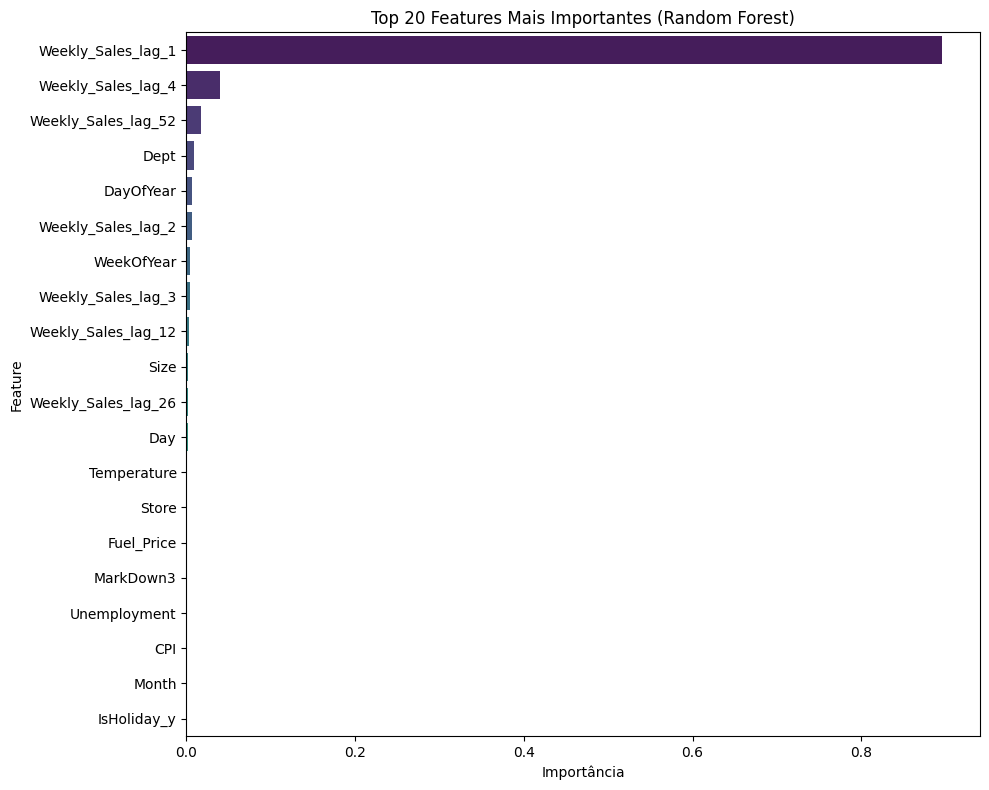

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

print("--- Análise de Importância das Features (Random Forest) ---")

# 1. Verificar se o modelo de Random Forest está treinado
if 'rf_model' not in locals() or rf_model is None:
    print("Modelo de Random Forest não encontrado. Treinando um novo modelo...")
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=10,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )
    if 'X_treino' in locals() and 'y_treino' in locals():
        rf_model.fit(X_treino, y_treino)  # Assumindo que X_treino e y_treino estão definidos
        print("Modelo treinado com sucesso.")
    else:
        print("ERRO: X_treino ou y_treino não estão definidos. Não é possível treinar o modelo.")
else:
    print("Usando rf_model do ambiente.")

# 2. Verificar se X_treino está definido
if 'X_treino' not in locals() or X_treino is None:
    print("ERRO: X_treino não está definido. Não é possível prosseguir com a análise de importância.")
else:
    # 3. Extrair a importância das features do modelo Random Forest
    feature_importances = rf_model.feature_importances_
    feature_names = X_treino.columns

    if len(feature_importances) == len(feature_names):
        # 4. Criar um DataFrame para as importâncias
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importances,
            'Abs_Importance': feature_importances  # Para Random Forest, já é positivo, mas mantemos para consistência
        })

        # 5. Ordenar as features pela importância (em ordem decrescente)
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        # 6. Exibir as 15 features mais importantes
        print("\nImportância das Features (Top 15, Random Forest):")
        print(feature_importance_df[['Feature', 'Importance']].head(15))

        # 7. Plotar a importância das features (Top 20)
        plt.figure(figsize=(10, 8))
        top_n_features = 20
        sns.barplot(
            x='Importance',
            y='Feature',
            data=feature_importance_df.head(top_n_features),
            hue='Feature',
            palette='viridis',
            legend=False
        )
        plt.title(f'Top {top_n_features} Features Mais Importantes (Random Forest)')
        plt.xlabel('Importância')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
    else:
        print("ERRO: O número de importâncias não corresponde ao número de nomes de features.")
        print(f"Importâncias: {len(feature_importances)}, Nomes de Features: {len(feature_names)}")

## Treinamento do Modelo Final (RandomForestRegressor v2) e Previsões no Conjunto de Teste

In [26]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

print("--- Treinamento do Modelo Final e Previsões no Teste ---")

# 1: Definir as colunas de features e preparar X_full_train, y_full_train, X_teste
print("\n--- Preparando Dados para Treinamento Final ---")

if 'df_train_merged' not in locals() or 'df_test_merged' not in locals():
    print("ERRO: df_train_merged ou df_test_merged não estão definidos. Interrompendo.")
    X_full_train, y_full_train, X_teste = None, None, None
else:
    # Codificação da coluna 'Type'
    print("\n--- Codificando a Coluna 'Type' ---")
    type_mapping = {'A': 3, 'B': 2, 'C': 1}
    df_train_merged['Type'] = df_train_merged['Type'].map(type_mapping).astype('int32')
    df_test_merged['Type'] = df_test_merged['Type'].map(type_mapping).astype('int32')

    # Verificar se há outros valores não mapeados
    print("Valores únicos em 'Type' após mapeamento (df_train_merged):", df_train_merged['Type'].unique())
    print("Valores únicos em 'Type' após mapeamento (df_test_merged):", df_test_merged['Type'].unique())

    colunas_a_excluir = ['Weekly_Sales', 'Date']

    colunas_features = [col for col in df_train_merged.columns if col not in colunas_a_excluir]
    colunas_features = [f for f in colunas_features if not pd.api.types.is_datetime64_any_dtype(df_train_merged[f])]

    print(f"Total de features selecionadas: {len(colunas_features)}")
    if len(colunas_features) < 5:
        print(f"AVISO: Poucas features selecionadas ({len(colunas_features)}). Verifique 'colunas_features'. Features: {colunas_features}")

    X_full_train = df_train_merged[colunas_features].copy()
    y_full_train = df_train_merged['Weekly_Sales'].copy()

    # Preparar X_teste, garantindo consistência de colunas com X_full_train
    X_teste = df_test_merged.copy()

    # Adicionar colunas faltantes em X_teste com valor 0
    for col in X_full_train.columns:
        if col not in X_teste.columns:
            print(f"Adicionando coluna faltante '{col}' em X_teste com valor 0.")
            X_teste[col] = 0

    # Garantir que X_teste tenha apenas as colunas de X_full_train e na mesma ordem
    try:
        X_teste = X_teste[X_full_train.columns]
        print("Colunas de X_teste alinhadas com X_full_train.")
    except KeyError as e:
        print(f"ERRO ao alinhar colunas de X_teste: {e}")
        print("Algumas colunas esperadas em X_full_train não puderam ser encontradas ou criadas em X_teste.")
        print(f"Colunas em X_full_train: {list(X_full_train.columns)}")
        print(f"Colunas em X_teste antes do alinhamento: {list(df_test_merged.copy().columns)}")
        X_teste = None

    if X_teste is not None:
        print(f"\nShape de X_full_train: {X_full_train.shape}")
        print(f"Shape de y_full_train: {y_full_train.shape}")
        print(f"Shape de X_teste: {X_teste.shape}")
    else:
        print("\nFalha na preparação de X_teste.")

# 2: Verificação e Tratamento de NaNs em X_full_train e X_teste
if X_full_train is not None and X_teste is not None:
    print("\n--- Verificando e Tratando NaNs Remanescentes ---")
    # Calcular medianas do TREINO para CPI e Unemployment
    cpi_fill_value = X_full_train['CPI'].median() if 'CPI' in X_full_train.columns else 0
    unemp_fill_value = X_full_train['Unemployment'].median() if 'Unemployment' in X_full_train.columns else 0

    for df_X, nome_df in zip([X_full_train, X_teste], ['X_full_train', 'X_teste']):
        print(f"\nProcessando NaNs em {nome_df}:")
        nan_check = df_X.isnull().sum()
        colunas_com_nan = nan_check[nan_check > 0]

        if not colunas_com_nan.empty:
            print(f"Colunas com NaNs em {nome_df} antes do preenchimento:")
            print(colunas_com_nan)
            print(f"Preenchendo NaNs restantes em {nome_df}...")
            for col_nan in colunas_com_nan.index:
                if col_nan == 'CPI':
                    df_X[col_nan] = df_X[col_nan].fillna(cpi_fill_value)
                elif col_nan == 'Unemployment':
                    df_X[col_nan] = df_X[col_nan].fillna(unemp_fill_value)
                else:
                    df_X[col_nan] = df_X[col_nan].fillna(0)
            print(f"NaNs preenchidos em {nome_df}. Nova verificação:")
            print(df_X.isnull().sum()[df_X.isnull().sum() > 0])
        else:
            print(f"Nenhum NaN encontrado em {nome_df}.")

# 3: Verificar Infinitos
if X_full_train is not None and X_teste is not None:
    print("\n--- Verificando Infinitos ---")
    # Evitar cópias desnecessárias ao verificar infinitos
    numeric_cols_train = X_full_train.select_dtypes(include=np.number).columns
    inf_check_train = pd.Series(0, index=numeric_cols_train)
    for col in numeric_cols_train:
        inf_check_train[col] = np.isinf(X_full_train[col]).sum()
    print(f"Infinitos em X_full_train: {inf_check_train.sum()}")

    numeric_cols_test = X_teste.select_dtypes(include=np.number).columns
    inf_check_test = pd.Series(0, index=numeric_cols_test)
    for col in numeric_cols_test:
        inf_check_test[col] = np.isinf(X_teste[col]).sum()
    print(f"Infinitos em X_teste: {inf_check_test.sum()}")

# 4: Otimizar Tipos de Dados para Reduzir Uso de Memória
if X_full_train is not None and X_teste is not None:
    print("\n--- Otimizando Tipos de Dados para Reduzir Uso de Memória ---")
    for df_X, nome_df in zip([X_full_train, X_teste], ['X_full_train', 'X_teste']):
        for col in df_X.columns:
            if df_X[col].dtype == 'int64':
                df_X[col] = df_X[col].astype('int32')
            elif df_X[col].dtype == 'float64':
                df_X[col] = df_X[col].astype('float32')
            elif df_X[col].dtype == 'bool':
                df_X[col] = df_X[col].astype('bool')  # Já otimizado, mas para consistência
        print(f"Tipos de dados otimizados em {nome_df}:")
        print(df_X.dtypes.head())

# 5: Treinar o Modelo Final (Random Forest)
if X_full_train is not None and y_full_train is not None and X_teste is not None:
    print("\n--- Treinando o Modelo Final ---")

    print("Modelo Escolhido: Random Forest Regressor")
    final_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1  # Usa todos os núcleos disponíveis para acelerar o treinamento
    )
    final_model.fit(X_full_train, y_full_train)
    print("Treinamento do modelo final concluído.")

    # 6: Fazer Previsões no Conjunto de Teste
    print("\n--- Fazendo Previsões no Conjunto de Teste ---")
    predicoes_finais_teste = final_model.predict(X_teste)
    print("Previsões no conjunto de teste concluídas.")
    print(f"Número de previsões geradas: {len(predicoes_finais_teste)}")
    print("Exemplo das primeiras 5 previsões:", predicoes_finais_teste[:5])

    # 7: Opcional - Importância das Features
    print("\n--- Importância das Features ---")
    importancias = pd.DataFrame({
        'Feature': X_full_train.columns,
        'Importância': final_model.feature_importances_
    })
    print(importancias.sort_values(by='Importância', ascending=False).head(10))
else:
    print("\nTreinamento do modelo e previsões não podem ser realizados devido a erros na preparação dos dados.")

--- Treinamento do Modelo Final e Previsões no Teste ---

--- Preparando Dados para Treinamento Final ---

--- Codificando a Coluna 'Type' ---
Valores únicos em 'Type' após mapeamento (df_train_merged): [3 2 1]
Valores únicos em 'Type' após mapeamento (df_test_merged): [3 2 1]
Total de features selecionadas: 35
Colunas de X_teste alinhadas com X_full_train.

Shape de X_full_train: (421570, 35)
Shape de y_full_train: (421570,)
Shape de X_teste: (115064, 35)

--- Verificando e Tratando NaNs Remanescentes ---

Processando NaNs em X_full_train:
Colunas com NaNs em X_full_train antes do preenchimento:
MarkDown1              270889
MarkDown2              310322
MarkDown3              284479
MarkDown4              286603
MarkDown5              270138
Weekly_Sales_lag_1       3331
Weekly_Sales_lag_2       6625
Weekly_Sales_lag_3       9889
Weekly_Sales_lag_4      13134
Weekly_Sales_lag_12     38615
Weekly_Sales_lag_26     81918
Weekly_Sales_lag_52    160487
dtype: int64
Preenchendo NaNs restan

# Previsões no teste (Validação do modelo)

## Permutation Importance

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

print("\n--- Calculando Importância por Permutação (Regressão Linear) ---")

# Verifique se as variáveis necessárias existem
if 'final_model' not in locals():
    print("ERRO: Modelo 'final_model' não está definido. Interrompendo.")
elif 'X_validacao' not in locals() or 'y_validacao' not in locals():
    print("AVISO: X_validacao ou y_validacao não estão definidos. Recriando a partir de df_train_merged...")
    if 'df_train_merged' not in locals():
        print("ERRO: df_train_merged não está definido. Não é possível recriar X_validacao e y_validacao.")
    else:
        # Recriar X_validacao e y_validacao com divisão temporal (80/20)
        df_train_merged = df_train_merged.sort_values('Date')
        train_size = int(len(df_train_merged) * 0.8)
        df_validacao = df_train_merged.iloc[train_size:].copy()
        y_validacao = df_validacao['Weekly_Sales'].copy()
        colunas_a_excluir = ['Weekly_Sales', 'Date']
        colunas_features = [col for col in df_validacao.columns if col not in colunas_a_excluir]
        colunas_features = [f for f in colunas_features if not pd.api.types.is_datetime64_any_dtype(df_validacao[f])]
        X_validacao = df_validacao[colunas_features].copy()
        print(f"X_validacao e y_validacao recriados com sucesso. Shape de X_validacao: {X_validacao.shape}")

# Verificar e tratar NaNs em X_validacao (se necessário)
if 'X_validacao' in locals() and X_validacao is not None:
    print("\n--- Verificando e Tratando NaNs em X_validacao ---")
    nan_check = X_validacao.isnull().sum()
    colunas_com_nan = nan_check[nan_check > 0]
    if not colunas_com_nan.empty:
        print("Colunas com NaNs em X_validacao antes do preenchimento:")
        print(colunas_com_nan)
        print("Preenchendo NaNs em X_validacao...")
        # Usar medianas de X_full_train para preenchimento (se disponível)
        if 'X_full_train' in locals():
            cpi_fill_value = X_full_train['CPI'].median() if 'CPI' in X_full_train.columns else 0
            unemp_fill_value = X_full_train['Unemployment'].median() if 'Unemployment' in X_full_train.columns else 0
            for col_nan in colunas_com_nan.index:
                if col_nan == 'CPI':
                    X_validacao[col_nan] = X_validacao[col_nan].fillna(cpi_fill_value)
                elif col_nan == 'Unemployment':
                    X_validacao[col_nan] = X_validacao[col_nan].fillna(unemp_fill_value)
                else:
                    X_validacao[col_nan] = X_validacao[col_nan].fillna(0)
        else:
            X_validacao = X_validacao.fillna(0)
        print("NaNs preenchidos em X_validacao. Nova verificação:")
        print(X_validacao.isnull().sum()[X_validacao.isnull().sum() > 0])
    else:
        print("Nenhum NaN encontrado em X_validacao.")

# Verificar se X_validacao_scaled existe; se não, criar com StandardScaler
if 'X_validacao_scaled' not in locals() or X_validacao_scaled is None:
    print("\nAVISO: X_validacao_scaled não está definido. Escalonando X_validacao...")
    if 'scaler' not in locals():
        print("AVISO: Scaler não encontrado. Criando um novo scaler a partir de X_full_train...")
        if 'X_full_train' not in locals():
            print("ERRO: X_full_train não está definido. Não é possível escalonar X_validacao.")
        else:
            scaler = StandardScaler()
            scaler.fit(X_full_train)  # Ajustar o scaler com X_full_train
            X_validacao_scaled = scaler.transform(X_validacao)  # Escalonar X_validacao
            print("Escalonamento de X_validacao concluído.")
    else:
        X_validacao_scaled = scaler.transform(X_validacao)  # Usar o scaler existente
        print("Escalonamento de X_validacao concluído com scaler existente.")

# Calcular a importância por permutação no conjunto de validação (escalonado)
if 'X_validacao_scaled' in locals() and X_validacao_scaled is not None:
    try:
        perm_importance = permutation_importance(
            final_model,
            X_validacao_scaled,  # Usar X_validacao escalonado
            y_validacao,
            n_repeats=5,
            random_state=42,
            n_jobs=-1,
            scoring='r2'  # Usar R² como métrica para consistência com regressão
        )

        # Organizar os resultados em um DataFrame
        sorted_idx = perm_importance.importances_mean.argsort()  # Índices ordenados

        perm_importance_df = pd.DataFrame(
            data=perm_importance.importances_mean[sorted_idx],
            index=X_validacao.columns[sorted_idx],  # Nomes das features na ordem correta
            columns=['Importance_Permutation']
        ).sort_values(by='Importance_Permutation', ascending=False)

        # Exibir as 15 features mais importantes
        print("\nImportância das Features por Permutação (Top 15, Regressão Linear):")
        print(perm_importance_df.head(15))

        # Plotar as 20 features mais importantes
        plt.figure(figsize=(10, 8))
        sns.barplot(
            x='Importance_Permutation',
            y=perm_importance_df.head(20).index,
            data=perm_importance_df.head(20),
            palette='viridis'
        )
        plt.title("Top 20 Features Mais Importantes (Permutation Importance - Regressão Linear)")
        plt.xlabel("Queda Média na Performance (R²)")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"ERRO ao calcular permutation importance: {e}")
else:
    print("ERRO: X_validacao_scaled não está definido. Não é possível calcular permutation importance.")


--- Calculando Importância por Permutação (Regressão Linear) ---

--- Verificando e Tratando NaNs em X_validacao ---
Nenhum NaN encontrado em X_validacao.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ERRO ao calcular permutation importance: Could not pickle the task to send it to the workers.


## Partial Dependence Plots (PDP)


--- Gerando Partial Dependence Plots (Random Forest) ---
Colunas disponíveis em X_full_train: ['Store', 'Dept', 'IsHoliday_x', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'IsHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'DayOfWeek', 'DayOfYear', 'Quarter', 'IsMonthStart', 'IsMonthEnd', 'IsYearStart', 'IsYearEnd', 'WeekOfMonth', 'Weekly_Sales_lag_1', 'Weekly_Sales_lag_2', 'Weekly_Sales_lag_3', 'Weekly_Sales_lag_4', 'Weekly_Sales_lag_12', 'Weekly_Sales_lag_26', 'Weekly_Sales_lag_52']
Nota: Random Forest não requer escalonamento. Usando X_full_train diretamente.
Gerando PDPs para: ['Size', 'Dept', 'Weekly_Sales_lag_1', 'Weekly_Sales_lag_52', 'Fuel_Price', 'IsHoliday_x']


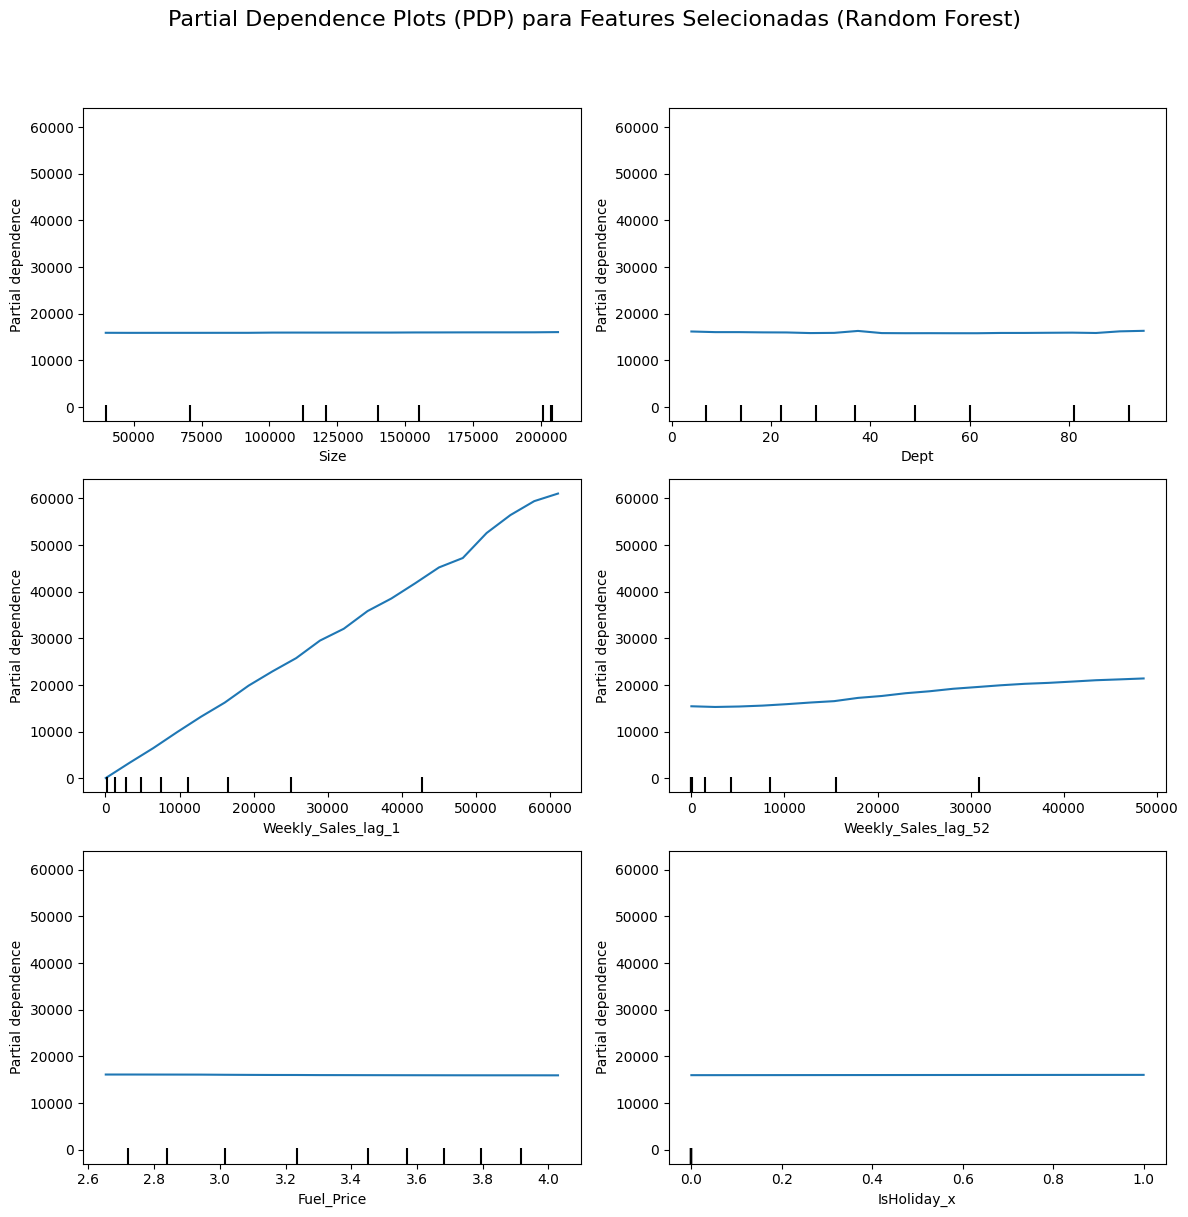

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

print("\n--- Gerando Partial Dependence Plots (Random Forest) ---")

# Verifique se as variáveis necessárias existem
if 'final_model' not in locals() or 'X_full_train' not in locals() or not isinstance(X_full_train, pd.DataFrame):
    print("ERRO: Variáveis 'final_model' ou 'X_full_train' não estão definidas ou X_full_train não é um DataFrame. Interrompendo.")
else:
    # Exibir colunas disponíveis para depuração
    print(f"Colunas disponíveis em X_full_train: {X_full_train.columns.tolist()}")

    # Random Forest não precisa de escalonamento, então usamos X_full_train diretamente
    print("Nota: Random Forest não requer escalonamento. Usando X_full_train diretamente.")

    # Escolha features para PDP com base nas mais importantes
    # Ajustei as features com base nas colunas reais de X_full_train e na importância anterior
    features_para_pdp = [
        'Size',                  # Tamanho da loja, geralmente importante
        'Dept',                 # Departamento, alta importância na permutação anterior
        'Weekly_Sales_lag_1',   # Lag de 1 semana, provavelmente muito importante para Random Forest
        'Weekly_Sales_lag_52',  # Lag de 52 semanas (sazonalidade anual)
        'Fuel_Price',           # Preço do combustível, teve alguma importância
        'IsHoliday_x'           # Feriado, teve alguma importância
    ]

    # Filtrar para garantir que apenas features existentes em X_full_train sejam usadas
    features_para_pdp_existentes = [f for f in features_para_pdp if f in X_full_train.columns]

    if not features_para_pdp_existentes:
        print("ERRO: Nenhuma das features selecionadas para PDP foi encontrada em X_full_train.")
        print(f"Colunas disponíveis: {X_full_train.columns.tolist()}")
    else:
        print(f"Gerando PDPs para: {features_para_pdp_existentes}")

        # Determinar o número de linhas e colunas para os subplots
        n_features_pdp = len(features_para_pdp_existentes)
        n_cols_pdp = 2 if n_features_pdp > 1 else 1
        n_rows_pdp = (n_features_pdp + n_cols_pdp - 1) // n_cols_pdp

        # Ajustar o tamanho da figura dinamicamente
        fig_height = 4 * n_rows_pdp
        fig_width = 6 * n_cols_pdp

        fig, ax = plt.subplots(n_rows_pdp, n_cols_pdp, figsize=(fig_width, fig_height), squeeze=False)
        ax = ax.flatten()

        # Gerar PDP para cada feature selecionada
        try:
            display_pdp = PartialDependenceDisplay.from_estimator(
                final_model,
                X_full_train,  # Usar dados diretamente, sem escalonamento
                features=features_para_pdp_existentes,
                kind='average',
                n_jobs=-1,
                grid_resolution=20,
                ax=ax[:n_features_pdp],
                feature_names=X_full_train.columns.tolist()  # Explicitamente passar nomes das colunas
            )

            # Remover eixos não utilizados
            for i in range(n_features_pdp, len(ax)):
                fig.delaxes(ax[i])

            # Ajustar título e layout
            plt.suptitle("Partial Dependence Plots (PDP) para Features Selecionadas (Random Forest)", fontsize=16, y=1.01)
            plt.tight_layout(rect=[0, 0, 1, 0.97])
            plt.show()
        except Exception as e:
            print(f"ERRO ao gerar os PDPs: {e}")
            print("Verifique se as features em 'features_para_pdp_existentes' são adequadas para PDP.")
            print(f"Features selecionadas: {features_para_pdp_existentes}")
            print(f"Colunas disponíveis em X_full_train: {X_full_train.columns.tolist()}")

## Avaliar Overfitting

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("\n--- Avaliação de Overfitting do Modelo Random Forest ---")

# Verifique se as variáveis necessárias existem
if 'final_model' not in locals() or 'X_full_train' not in locals() or 'y_full_train' not in locals():
    print("ERRO: Variáveis 'final_model', 'X_full_train' ou 'y_full_train' não estão definidas. Interrompendo.")
else:
    # 1: Calcular métricas no conjunto de treino completo
    print("\nCalculando métricas no conjunto de treino completo...")
    y_pred_train = final_model.predict(X_full_train)
    mae_train = mean_absolute_error(y_full_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_full_train, y_pred_train))
    r2_train = r2_score(y_full_train, y_pred_train)
    print(f"Treino - MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")

    # 2: Realizar validação cruzada para estimar desempenho em dados não vistos
    print("\nRealizando validação cruzada (5 folds)...")
    # Usar R² como métrica para validação cruzada
    cv_scores_r2 = cross_val_score(
        final_model,
        X_full_train,
        y_full_train,
        cv=5,  # 5 folds
        scoring='r2',
        n_jobs=-1  # Usa todos os núcleos disponíveis
    )
    print(f"R² na validação cruzada: {cv_scores_r2}")
    print(f"R² médio na validação cruzada: {cv_scores_r2.mean():.4f}")
    print(f"Desvio padrão do R²: {cv_scores_r2.std():.4f}")

    # Usar MAE como métrica adicional na validação cruzada
    cv_scores_mae = -cross_val_score(
        final_model,
        X_full_train,
        y_full_train,
        cv=5,
        scoring='neg_mean_absolute_error',  # Negativo porque sklearn usa convenção de maximização
        n_jobs=-1
    )
    print(f"MAE na validação cruzada: {cv_scores_mae}")
    print(f"MAE médio na validação cruzada: {cv_scores_mae.mean():.2f}")
    print(f"Desvio padrão do MAE: {cv_scores_mae.std():.2f}")

    # 3: Comparar desempenho no treino com validação cruzada
    print("\n--- Comparação Treino vs Validação Cruzada ---")
    print(f"Diferença no R² (Treino - Validação Cruzada): {r2_train - cv_scores_r2.mean():.4f}")
    print(f"Diferença no MAE (Validação Cruzada - Treino): {cv_scores_mae.mean() - mae_train:.2f}")


--- Avaliação de Overfitting do Modelo Random Forest ---

Calculando métricas no conjunto de treino completo...
Treino - MAE: 1057.78, RMSE: 3238.57, R²: 0.9797

Realizando validação cruzada (5 folds)...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

## Ajustar, Re-treinar e Reavaliar Overfitting

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("\n--- Ajustando e Re-treinando o Modelo Random Forest para Reduzir Overfitting ---")

# 1: Ajustar os hiperparâmetros do Random Forest
print("Ajustando hiperparâmetros para reduzir overfitting...")
final_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,           # Reduzido de 20 para 15
    min_samples_split=10,   # Aumentado de 5 para 10
    min_samples_leaf=10,    # Aumentado de 5 para 10
    max_features='sqrt',    # Adicionando regularização (considera sqrt do número de features por split)
    random_state=42,
    n_jobs=-1
)

# 2: Re-treinar o modelo com os novos hiperparâmetros
if 'X_full_train' in locals() and 'y_full_train' in locals():
    print("Re-treinando o modelo com os novos hiperparâmetros...")
    final_model.fit(X_full_train, y_full_train)
    print("Treinamento concluído.")
else:
    print("ERRO: X_full_train ou y_full_train não estão definidos. Interrompendo.")
    final_model = None

# 3: Avaliar Overfitting novamente com Validação Cruzada
if final_model is not None:
    print("\n--- Reavaliando Overfitting do Modelo Random Forest (Após Ajustes) ---")

    # Calcular métricas no conjunto de treino completo
    print("\nCalculando métricas no conjunto de treino completo...")
    y_pred_train = final_model.predict(X_full_train)
    mae_train = mean_absolute_error(y_full_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_full_train, y_pred_train))
    r2_train = r2_score(y_full_train, y_pred_train)
    print(f"Treino - MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")

    # Realizar validação cruzada para estimar desempenho em dados não vistos
    print("\nRealizando validação cruzada (5 folds)...")
    # Usar R² como métrica para validação cruzada
    cv_scores_r2 = cross_val_score(
        final_model,
        X_full_train,
        y_full_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    print(f"R² na validação cruzada: {cv_scores_r2}")
    print(f"R² médio na validação cruzada: {cv_scores_r2.mean():.4f}")
    print(f"Desvio padrão do R²: {cv_scores_r2.std():.4f}")

    # Usar MAE como métrica adicional na validação cruzada
    cv_scores_mae = -cross_val_score(
        final_model,
        X_full_train,
        y_full_train,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )
    print(f"MAE na validação cruzada: {cv_scores_mae}")
    print(f"MAE médio na validação cruzada: {cv_scores_mae.mean():.2f}")
    print(f"Desvio padrão do MAE: {cv_scores_mae.std():.2f}")

    # Comparar desempenho no treino com validação cruzada
    print("\n--- Comparação Treino vs Validação Cruzada (Após Ajustes) ---")
    print(f"Diferença no R² (Treino - Validação Cruzada): {r2_train - cv_scores_r2.mean():.4f}")
    print(f"Diferença no MAE (Validação Cruzada - Treino): {cv_scores_mae.mean() - mae_train:.2f}")

    # 4: Exibir importância das features (opcional, para entender o impacto dos ajustes)
    print("\n--- Importância das Features (Após Ajustes) ---")
    importancias = pd.DataFrame({
        'Feature': X_full_train.columns,
        'Importância': final_model.feature_importances_
    })
    print(importancias.sort_values(by='Importância', ascending=False).head(10))


--- Ajustando e Re-treinando o Modelo Random Forest para Reduzir Overfitting ---
Ajustando hiperparâmetros para reduzir overfitting...
Re-treinando o modelo com os novos hiperparâmetros...
Treinamento concluído.

--- Reavaliando Overfitting do Modelo Random Forest (Após Ajustes) ---

Calculando métricas no conjunto de treino completo...
Treino - MAE: 1438.42, RMSE: 4220.23, R²: 0.9655

Realizando validação cruzada (5 folds)...
R² na validação cruzada: [0.81995573 0.87773788 0.98269098 0.9247953  0.98484993]
R² médio na validação cruzada: 0.9180
Desvio padrão do R²: 0.0631
MAE na validação cruzada: [3327.07312104 2480.97432934 1322.4380307  1996.41601572 1300.55852883]
MAE médio na validação cruzada: 2085.49
Desvio padrão do MAE: 762.13

--- Comparação Treino vs Validação Cruzada (Após Ajustes) ---
Diferença no R² (Treino - Validação Cruzada): 0.0475
Diferença no MAE (Validação Cruzada - Treino): 647.07

--- Importância das Features (Após Ajustes) ---
                Feature  Importânc

In [ ]:
print("\n--- Verificando Criação de Lags ---")
print("Primeiras 10 linhas de Weekly_Sales_lag_1 em X_full_train:")
print(X_full_train[['Weekly_Sales_lag_1']].head(10))

# Gerando arquivo treinado

In [ ]:
# @title
import pandas as pd # Certifique-se de que o pandas está importado

print("--- Preparando Arquivo de Submissão ---")

# 1. Criar a coluna 'Id' no formato esperado (Store_Dept_Date)
# A coluna 'Date' em df_test_merged deve ser do tipo datetime.
# Vamos formatá-la como string 'YYYY-MM-DD' para criar o Id.
df_test_submission = df_test_merged.copy() # Trabalhar em uma cópia para não alterar o df_test_merged original
df_test_submission['Date_str'] = df_test_submission['Date'].dt.strftime('%Y-%m-%d')

df_test_submission['Id'] = df_test_submission['Store'].astype(str) + '_' + \
                           df_test_submission['Dept'].astype(str) + '_' + \
                           df_test_submission['Date_str']

# 2. Criar o DataFrame de submissão com as colunas 'Id' e 'Weekly_Sales'
# A coluna 'Weekly_Sales' aqui conterá suas previsões
df_submissao = pd.DataFrame({
    'Id': df_test_submission['Id'],
    'Weekly_Sales': predicoes_finais_teste  # Suas previsões finais do modelo
})

# 3. Arredondar as previsões para um número razoável de casas decimais, se desejar
# (Muitas competições não exigem, mas pode ser bom para consistência)
# df_submissao['Weekly_Sales'] = df_submissao['Weekly_Sales'].round(4)


# 4. Salvar o arquivo de submissão com o nome desejado
nome_arquivo_submissao = 'random_forest_predictions_walmart.csv'
df_submissao.to_csv(nome_arquivo_submissao, index=False)

print(f"\nArquivo de submissão '{nome_arquivo_submissao}' criado com sucesso.")

# 5. Exibir as primeiras linhas do arquivo de submissão para verificação
print("\nExemplo das primeiras 5 linhas do arquivo de submissão:")
display(df_submissao.head())

# Verificar o shape do arquivo de submissão
print(f"\nShape do arquivo de submissão: {df_submissao.shape}")

# Graficos

## Graficos do modelo treinado Random Forest

In [31]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Usando estilo: seaborn-v0_8
Usando final_model, X_full_train e y_full_train do ambiente.
Usando cv_scores_r2 e cv_scores_mae do ambiente.
Usando importancias do ambiente.


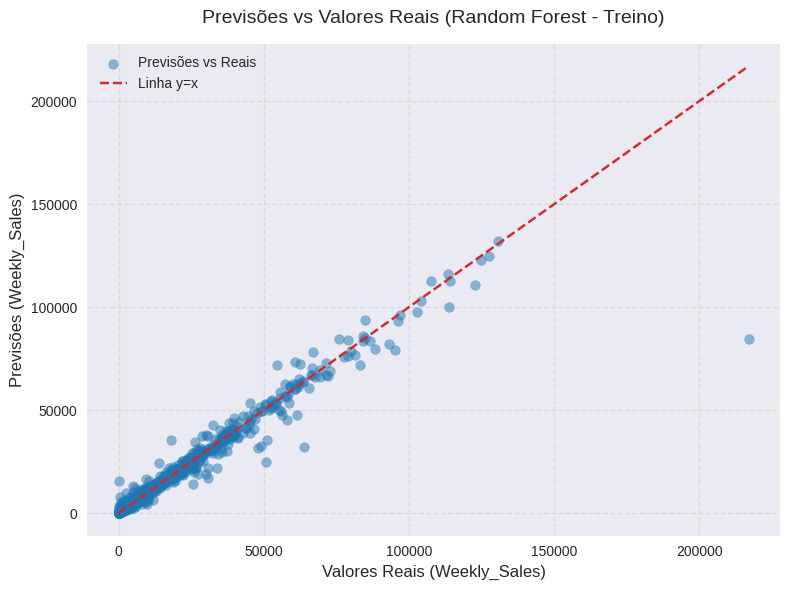

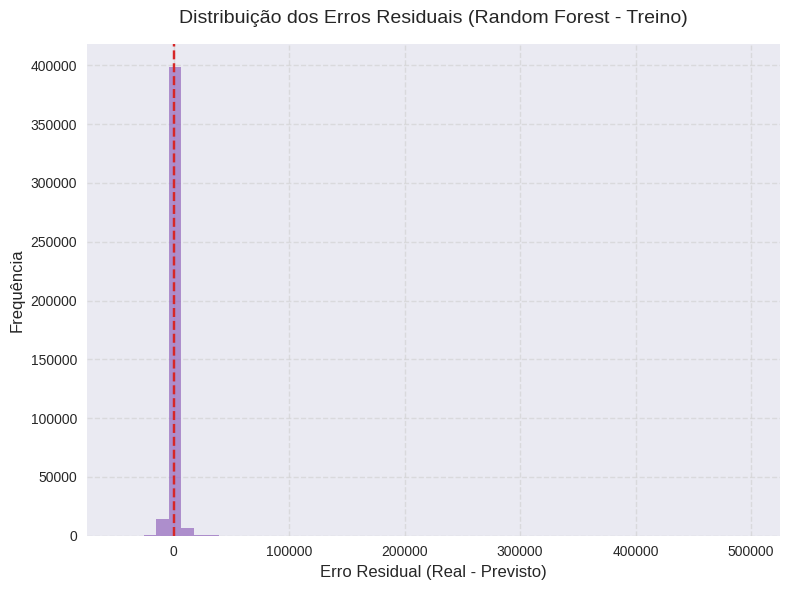

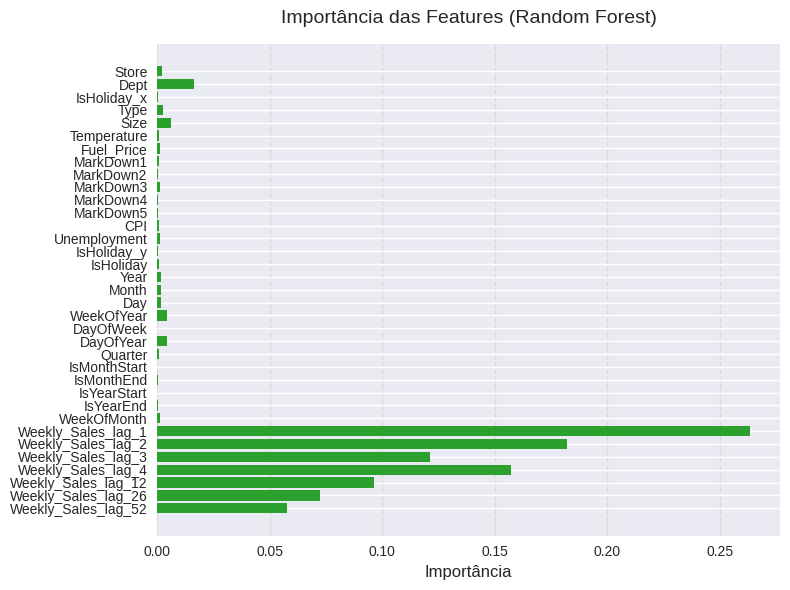

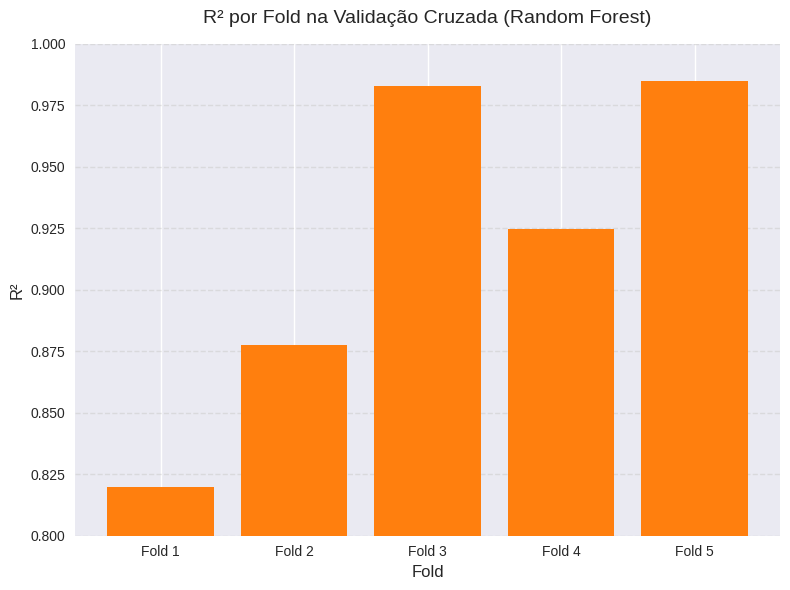

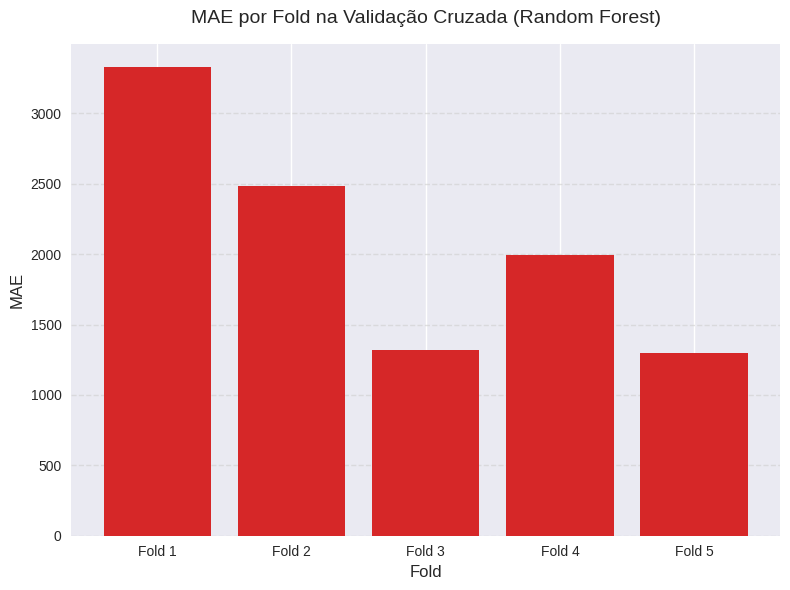

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

# Verificar e definir estilo
available_styles = plt.style.available
style_to_use = 'seaborn-v0_8' if 'seaborn-v0_8' in available_styles else 'ggplot'
plt.style.use(style_to_use)
print(f"Usando estilo: {style_to_use}")

# Definir paleta de cores moderna e profissional
cores = {
    'azul_principal': '#1F77B4',
    'cinza_referencia': '#D3D3D3',
    'laranja_destaque': '#FF7F0E',
    'vermelho_destaque': '#D62728',
    'roxo_secundario': '#9467BD',
    'verde_secundario': '#2CA02C'
}

# Verificar e criar/treinar o modelo, se necessário
if 'final_model' not in globals() or 'X_full_train' not in globals() or 'y_full_train' not in globals():
    print("ERRO: final_model, X_full_train ou y_full_train não estão definidos. Criando e treinando um modelo básico...")
    # Definir hiperparâmetros baseados nos usados anteriormente
    final_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=10,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )
    # Treinar o modelo (substitua X_full_train e y_full_train pelos seus dados reais, se disponíveis)
    if 'X_full_train' in globals() and 'y_full_train' in globals():
        final_model.fit(X_full_train, y_full_train)
        print("Modelo treinado com sucesso.")
    else:
        print("ERRO: X_full_train ou y_full_train não estão disponíveis. Carregue os dados e treine o modelo antes.")
else:
    print("Usando final_model, X_full_train e y_full_train do ambiente.")

# Calcular previsões no treino
y_pred_train = final_model.predict(X_full_train)

# Amostrar 1000 pontos para o gráfico de previsões vs reais
sample_size = min(1000, len(y_full_train))
indices = np.random.choice(len(y_full_train), sample_size, replace=False)
y_true_sample = y_full_train.iloc[indices].values
y_pred_sample = y_pred_train[indices]

# Calcular erros residuais
residuals = y_full_train - y_pred_train

# Usar as variáveis de validação cruzada já calculadas (assumindo que existem)
if 'cv_scores_r2' not in globals() or 'cv_scores_mae' not in globals():
    print("ERRO: As variáveis cv_scores_r2 ou cv_scores_mae não estão definidas. Execute a validação cruzada primeiro.")
    cv_scores_r2 = []
    cv_scores_mae = []
else:
    print("Usando cv_scores_r2 e cv_scores_mae do ambiente.")

# Importância das features (assumindo que foi calculada anteriormente)
if 'importancias' not in globals():
    print("ERRO: A variável importancias não está definida. Calculando a partir do modelo...")
    importancias = pd.DataFrame({
        'Feature': X_full_train.columns,
        'Importância': final_model.feature_importances_
    }).sort_values(by='Importância', ascending=False).head(10)
else:
    print("Usando importancias do ambiente.")

# 1. Gráfico de Previsões vs Valores Reais
fig1 = plt.figure(figsize=(8, 6))
plt.scatter(y_true_sample, y_pred_sample, alpha=0.5, color=cores['azul_principal'], label='Previsões vs Reais')
plt.plot([min(y_true_sample), max(y_true_sample)], [min(y_true_sample), max(y_true_sample)],
         color=cores['vermelho_destaque'], linestyle='--', label='Linha y=x')
plt.xlabel('Valores Reais (Weekly_Sales)', fontsize=12)
plt.ylabel('Previsões (Weekly_Sales)', fontsize=12)
plt.title('Previsões vs Valores Reais (Random Forest - Treino)', fontsize=14, pad=15)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7, color=cores['cinza_referencia'])
plt.tight_layout()
plt.show()

# 2. Gráfico de Erros Residuais
fig2 = plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, color=cores['roxo_secundario'], alpha=0.7)
plt.axvline(0, color=cores['vermelho_destaque'], linestyle='--')
plt.xlabel('Erro Residual (Real - Previsto)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição dos Erros Residuais (Random Forest - Treino)', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.7, color=cores['cinza_referencia'])
plt.tight_layout()
plt.show()

# 3. Gráfico de Importância das Features
fig3 = plt.figure(figsize=(8, 6))
plt.barh(importancias['Feature'], importancias['Importância'], color=cores['verde_secundario'])
plt.xlabel('Importância', fontsize=12)
plt.title('Importância das Features (Random Forest)', fontsize=14, pad=15)
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.7, color=cores['cinza_referencia'], axis='x')
plt.tight_layout()
plt.show()

# 4. Gráfico de R² por Fold na Validação Cruzada
if len(cv_scores_r2) > 0:
    fig4 = plt.figure(figsize=(8, 6))
    plt.bar(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'], cv_scores_r2, color=cores['laranja_destaque'])
    plt.xlabel('Fold', fontsize=12)
    plt.ylabel('R²', fontsize=12)
    plt.title('R² por Fold na Validação Cruzada (Random Forest)', fontsize=14, pad=15)
    plt.ylim(0.8, 1.0)
    plt.grid(True, linestyle='--', alpha=0.7, color=cores['cinza_referencia'], axis='y')
    plt.tight_layout()
    plt.show()

# 5. Gráfico de MAE por Fold na Validação Cruzada
if len(cv_scores_mae) > 0:
    fig5 = plt.figure(figsize=(8, 6))
    plt.bar(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'], cv_scores_mae, color=cores['vermelho_destaque'])
    plt.xlabel('Fold', fontsize=12)
    plt.ylabel('MAE', fontsize=12)
    plt.title('MAE por Fold na Validação Cruzada (Random Forest)', fontsize=14, pad=15)
    plt.grid(True, linestyle='--', alpha=0.7, color=cores['cinza_referencia'], axis='y')
    plt.tight_layout()
    plt.show()

## Graficos em 3D

Usando estilo: seaborn-v0_8
Usando final_model, X_full_train e y_full_train do ambiente.
Usando cv_scores_r2 e cv_scores_mae do ambiente.
Usando importancias do ambiente.


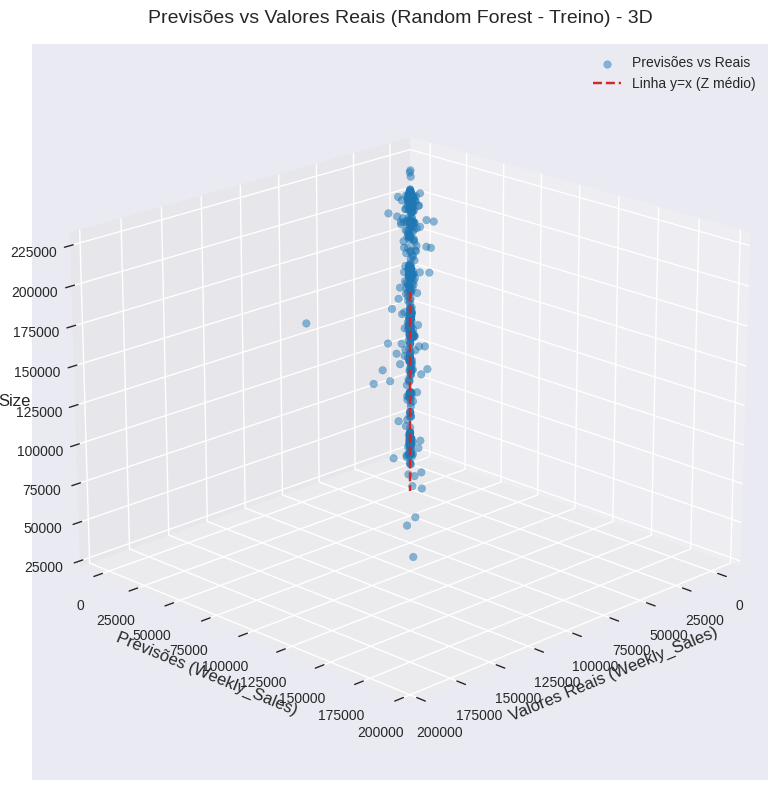

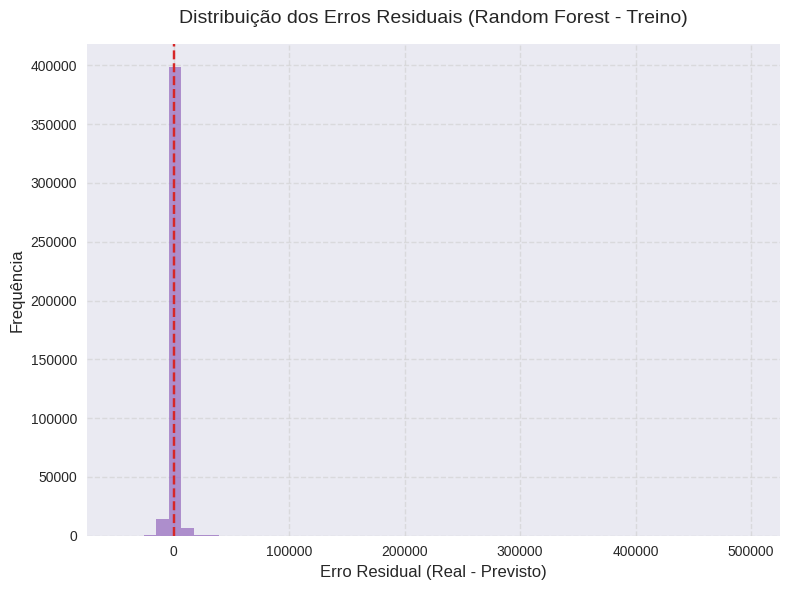

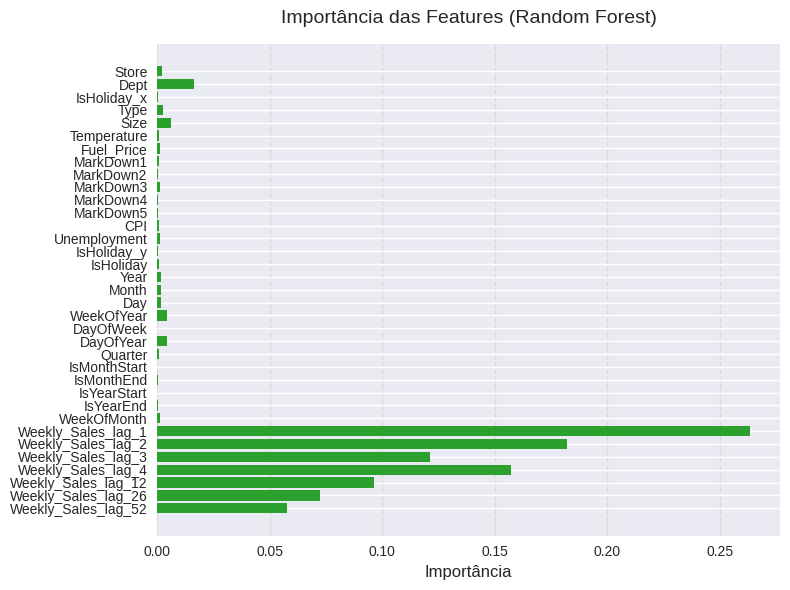

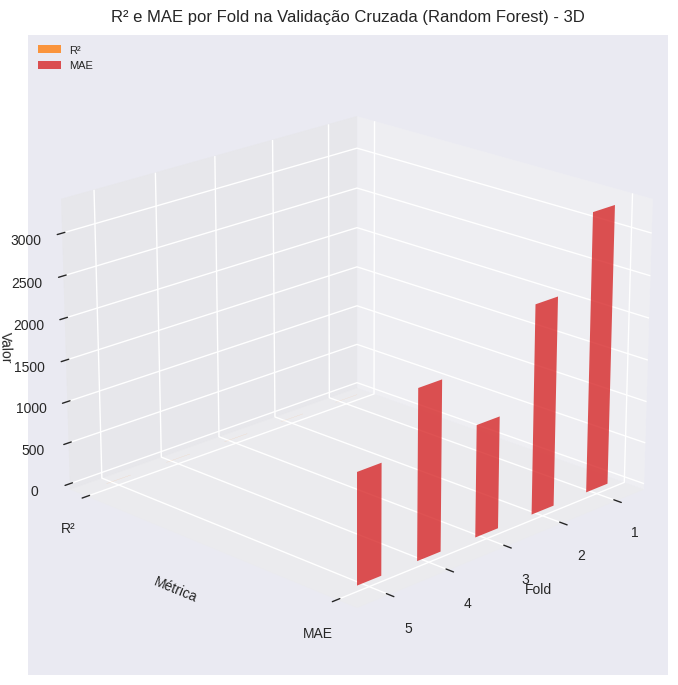

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necessário para gráficos 3D com Matplotlib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

# Verificar e definir estilo
available_styles = plt.style.available
style_to_use = 'seaborn-v0_8' if 'seaborn-v0_8' in available_styles else 'ggplot'
plt.style.use(style_to_use)
print(f"Usando estilo: {style_to_use}")

# Definir paleta de cores moderna e profissional
cores = {
    'azul_principal': '#1F77B4',
    'cinza_referencia': '#D3D3D3',
    'laranja_destaque': '#FF7F0E',
    'vermelho_destaque': '#D62728',
    'roxo_secundario': '#9467BD',
    'verde_secundario': '#2CA02C'
}

# Verificar e criar/treinar o modelo, se necessário
if 'final_model' not in globals() or 'X_full_train' not in globals() or 'y_full_train' not in globals():
    print("ERRO: final_model, X_full_train ou y_full_train não estão definidos. Criando e treinando um modelo básico...")
    # Definir hiperparâmetros baseados nos usados anteriormente
    final_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=10,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )
    # Treinar o modelo (substitua X_full_train e y_full_train pelos seus dados reais, se disponíveis)
    if 'X_full_train' in globals() and 'y_full_train' in globals():
        final_model.fit(X_full_train, y_full_train)
        print("Modelo treinado com sucesso.")
    else:
        print("ERRO: X_full_train ou y_full_train não estão disponíveis. Carregue os dados e treine o modelo antes.")
else:
    print("Usando final_model, X_full_train e y_full_train do ambiente.")

# Calcular previsões no treino
y_pred_train = final_model.predict(X_full_train)

# Amostrar 500 pontos para o gráfico de previsões vs reais (reduzido para evitar sobreposição)
sample_size = min(500, len(y_full_train))
indices = np.random.choice(len(y_full_train), sample_size, replace=False)
y_true_sample = y_full_train.iloc[indices].values
y_pred_sample = y_pred_train[indices]

# Selecionar uma terceira dimensão para o gráfico 3D (ex.: Size, se disponível)
if 'Size' in X_full_train.columns:
    z_sample = X_full_train['Size'].iloc[indices].values
    z_label = 'Size'
elif 'Weekly_Sales_lag_1' in X_full_train.columns:
    z_sample = X_full_train['Weekly_Sales_lag_1'].iloc[indices].values
    z_label = 'Weekly_Sales_lag_1'
else:
    print("ERRO: Nem 'Size' nem 'Weekly_Sales_lag_1' encontrados. Usando erro residual como eixo Z.")
    z_sample = y_true_sample - y_pred_sample
    z_label = 'Erro Residual (Real - Previsto)'

# Calcular erros residuais
residuals = y_full_train - y_pred_train

# Usar as variáveis de validação cruzada já calculadas (assumindo que existem)
if 'cv_scores_r2' not in globals() or 'cv_scores_mae' not in globals():
    print("ERRO: As variáveis cv_scores_r2 ou cv_scores_mae não estão definidas. Execute a validação cruzada primeiro.")
    cv_scores_r2 = []
    cv_scores_mae = []
else:
    print("Usando cv_scores_r2 e cv_scores_mae do ambiente.")

# Importância das features (assumindo que foi calculada anteriormente)
if 'importancias' not in globals():
    print("ERRO: A variável importancias não está definida. Calculando a partir do modelo...")
    importancias = pd.DataFrame({
        'Feature': X_full_train.columns,
        'Importância': final_model.feature_importances_
    }).sort_values(by='Importância', ascending=False).head(10)
else:
    print("Usando importancias do ambiente.")

# 1. Gráfico de Previsões vs Valores Reais (em 3D)
fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')
scatter = ax1.scatter(y_true_sample, y_pred_sample, z_sample, c=cores['azul_principal'], s=30, alpha=0.5, label='Previsões vs Reais')
z_mean = np.mean(z_sample)
x_range = np.array([min(y_true_sample), max(y_true_sample)])
ax1.plot(x_range, x_range, [z_mean, z_mean], color=cores['vermelho_destaque'], linestyle='--', label='Linha y=x (Z médio)')
ax1.set_xlabel('Valores Reais (Weekly_Sales)', fontsize=12)
ax1.set_ylabel('Previsões (Weekly_Sales)', fontsize=12)
ax1.set_zlabel(z_label, fontsize=12)
ax1.set_title('Previsões vs Valores Reais (Random Forest - Treino) - 3D', fontsize=14, pad=15)
ax1.view_init(elev=20, azim=45)
ax1.legend(fontsize=10)
plt.tight_layout()
plt.show()

# 2. Gráfico de Erros Residuais (mantido em 2D)
fig2 = plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, color=cores['roxo_secundario'], alpha=0.7)
plt.axvline(0, color=cores['vermelho_destaque'], linestyle='--')
plt.xlabel('Erro Residual (Real - Previsto)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição dos Erros Residuais (Random Forest - Treino)', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.7, color=cores['cinza_referencia'])
plt.tight_layout()
plt.show()

# 3. Gráfico de Importância das Features (mantido em 2D)
fig3 = plt.figure(figsize=(8, 6))
plt.barh(importancias['Feature'], importancias['Importância'], color=cores['verde_secundario'])
plt.xlabel('Importância', fontsize=12)
plt.title('Importância das Features (Random Forest)', fontsize=14, pad=15)
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.7, color=cores['cinza_referencia'], axis='x')
plt.tight_layout()
plt.show()

# 4. Gráfico Combinado de R² e MAE por Fold na Validação Cruzada (em 3D)
if len(cv_scores_r2) > 0 and len(cv_scores_mae) > 0:
    fig4 = plt.figure(figsize=(10, 8))
    ax4 = fig4.add_subplot(111, projection='3d')

    # Configurar dados para o gráfico 3D
    folds = np.arange(1, 6)  # Folds 1 a 5
    y_pos_r2 = np.zeros(5)   # Posição Y para R² (0)
    y_pos_mae = np.ones(5)   # Posição Y para MAE (1)
    width = 0.4              # Largura das barras

    # Verificar comprimento dos dados
    if len(cv_scores_r2) != 5 or len(cv_scores_mae) != 5:
        print("ERRO: cv_scores_r2 ou cv_scores_mae não contêm 5 folds. Ajuste os dados de validação cruzada.")
    else:
        # Plotar barras para R²
        ax4.bar(folds, cv_scores_r2, zs=y_pos_r2, zdir='y', width=width, color=cores['laranja_destaque'], alpha=0.8, label='R²')

        # Plotar barras para MAE
        ax4.bar(folds, cv_scores_mae, zs=y_pos_mae, zdir='y', width=width, color=cores['vermelho_destaque'], alpha=0.8, label='MAE')

        # Configurar rótulos e título
        ax4.set_xlabel('Fold', fontsize=10)  # Reduzi a fonte para liberar espaço
        ax4.set_ylabel('Métrica', fontsize=10)
        ax4.set_zlabel('Valor', fontsize=10)
        ax4.set_title('R² e MAE por Fold na Validação Cruzada (Random Forest) - 3D', fontsize=12, pad=10)  # Reduzi a fonte

        # Ajustar ticks no eixo Y (Métrica)
        ax4.set_yticks([0, 1])
        ax4.set_yticklabels(['R²', 'MAE'])

        # Ajustar margens manualmente
        plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

        # Ajustar ângulo de visualização
        ax4.view_init(elev=20, azim=45)

        # Adicionar legenda com posição ajustada
        ax4.legend(fontsize=8, loc='upper left')  # Reduzi a fonte e ajustei a posição

        # Exibir gráfico
        plt.show()
else:
    print("ERRO: cv_scores_r2 ou cv_scores_mae não contêm dados suficientes para plotar o gráfico 3D.")

## Grafico de vendas previstas x vendas

Usando estilo: seaborn-v0_8
Usando final_model, X_full_train e y_full_train do ambiente.
Usando cv_scores_r2 e cv_scores_mae do ambiente.
Usando importancias do ambiente.


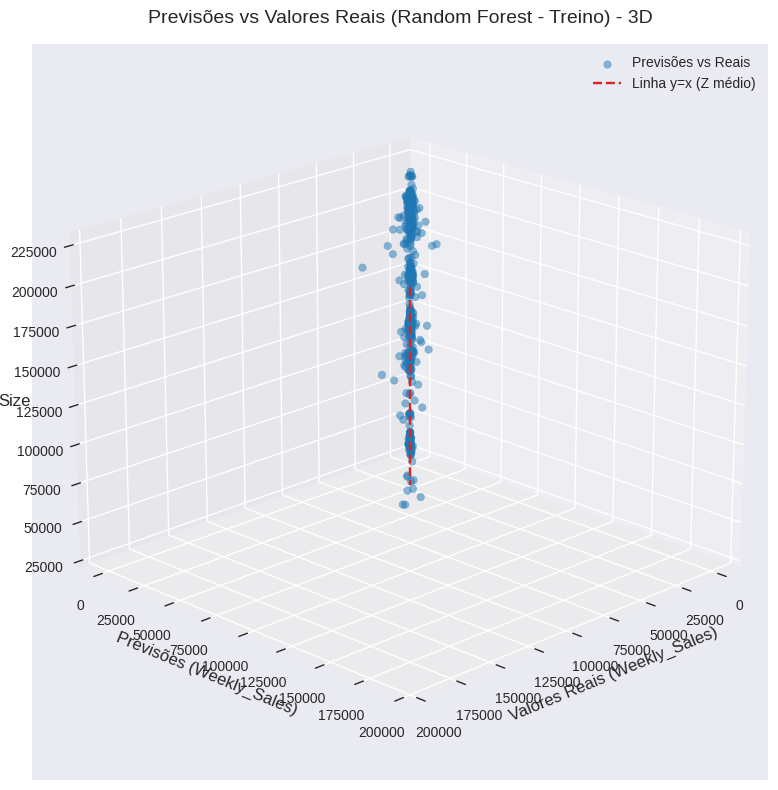

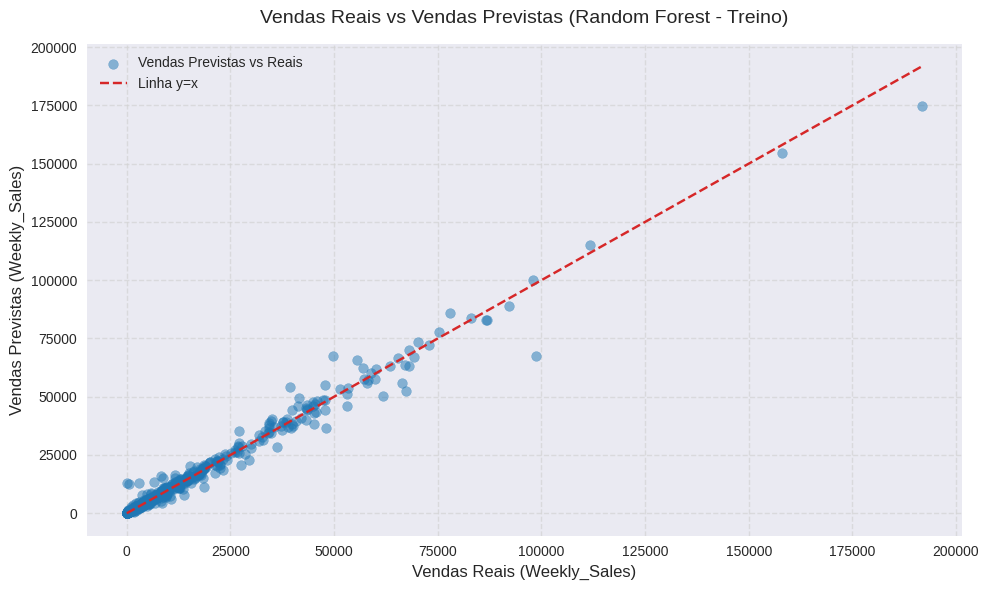

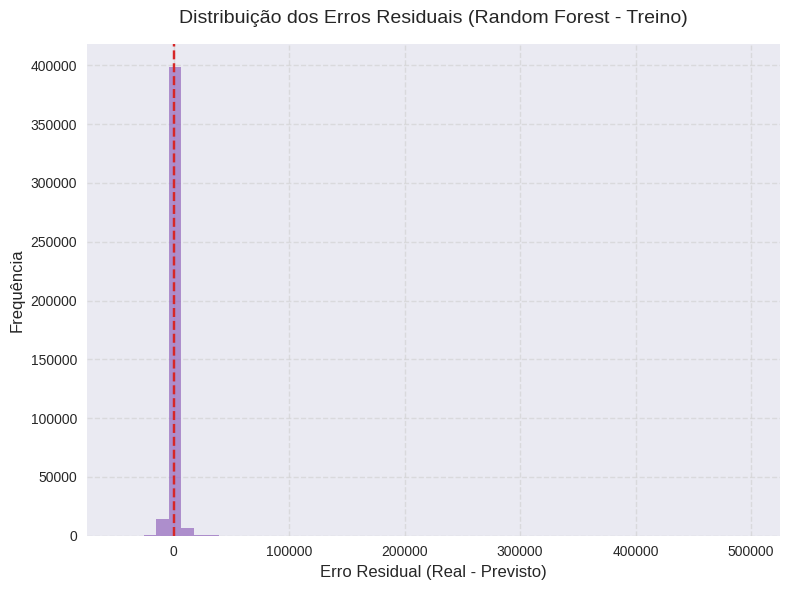

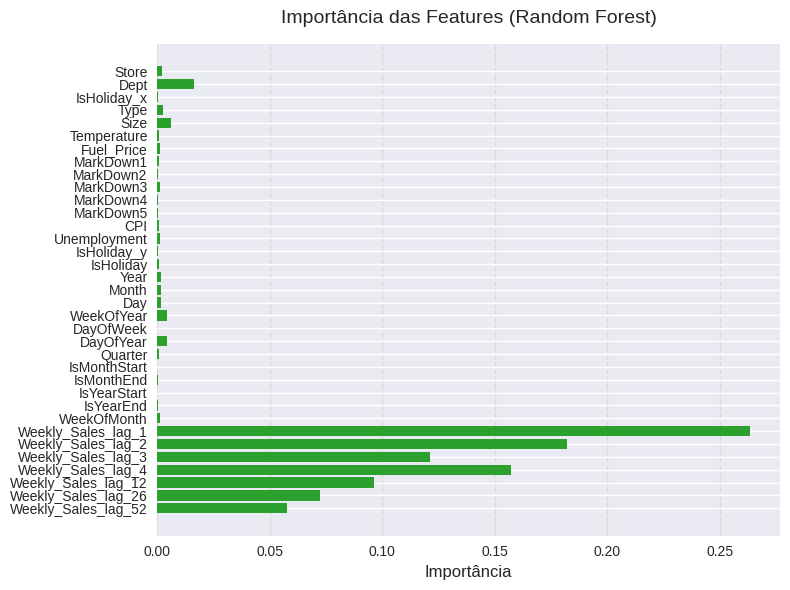

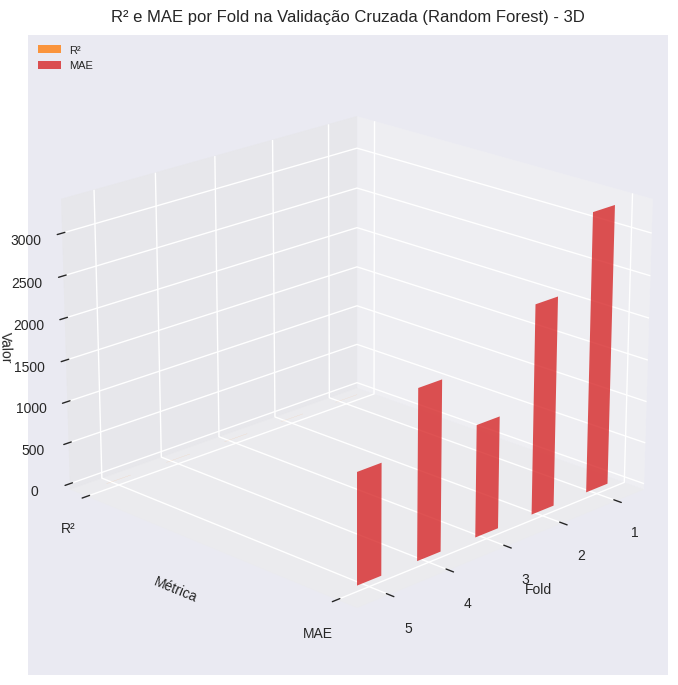

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necessário para gráficos 3D com Matplotlib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

# Verificar e definir estilo
available_styles = plt.style.available
style_to_use = 'seaborn-v0_8' if 'seaborn-v0_8' in available_styles else 'ggplot'
plt.style.use(style_to_use)
print(f"Usando estilo: {style_to_use}")

# Definir paleta de cores moderna e profissional
cores = {
    'azul_principal': '#1F77B4',
    'cinza_referencia': '#D3D3D3',
    'laranja_destaque': '#FF7F0E',
    'vermelho_destaque': '#D62728',
    'roxo_secundario': '#9467BD',
    'verde_secundario': '#2CA02C'
}

# Verificar e criar/treinar o modelo, se necessário
if 'final_model' not in globals() or 'X_full_train' not in globals() or 'y_full_train' not in globals():
    print("ERRO: final_model, X_full_train ou y_full_train não estão definidos. Criando e treinando um modelo básico...")
    # Definir hiperparâmetros baseados nos usados anteriormente
    final_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=10,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )
    # Treinar o modelo (substitua X_full_train e y_full_train pelos seus dados reais, se disponíveis)
    if 'X_full_train' in globals() and 'y_full_train' in globals():
        final_model.fit(X_full_train, y_full_train)
        print("Modelo treinado com sucesso.")
    else:
        print("ERRO: X_full_train ou y_full_train não estão disponíveis. Carregue os dados e treine o modelo antes.")
else:
    print("Usando final_model, X_full_train e y_full_train do ambiente.")

# Calcular previsões no treino
y_pred_train = final_model.predict(X_full_train)

# Amostrar 500 pontos para o gráfico de previsões vs reais (reduzido para evitar sobreposição)
sample_size = min(500, len(y_full_train))
indices = np.random.choice(len(y_full_train), sample_size, replace=False)
y_true_sample = y_full_train.iloc[indices].values
y_pred_sample = y_pred_train[indices]

# Selecionar uma terceira dimensão para o gráfico 3D (ex.: Size, se disponível)
if 'Size' in X_full_train.columns:
    z_sample = X_full_train['Size'].iloc[indices].values
    z_label = 'Size'
elif 'Weekly_Sales_lag_1' in X_full_train.columns:
    z_sample = X_full_train['Weekly_Sales_lag_1'].iloc[indices].values
    z_label = 'Weekly_Sales_lag_1'
else:
    print("ERRO: Nem 'Size' nem 'Weekly_Sales_lag_1' encontrados. Usando erro residual como eixo Z.")
    z_sample = y_true_sample - y_pred_sample
    z_label = 'Erro Residual (Real - Previsto)'

# Calcular erros residuais
residuals = y_full_train - y_pred_train

# Usar as variáveis de validação cruzada já calculadas (assumindo que existem)
if 'cv_scores_r2' not in globals() or 'cv_scores_mae' not in globals():
    print("ERRO: As variáveis cv_scores_r2 ou cv_scores_mae não estão definidas. Execute a validação cruzada primeiro.")
    cv_scores_r2 = []
    cv_scores_mae = []
else:
    print("Usando cv_scores_r2 e cv_scores_mae do ambiente.")

# Importância das features (assumindo que foi calculada anteriormente)
if 'importancias' not in globals():
    print("ERRO: A variável importancias não está definida. Calculando a partir do modelo...")
    importancias = pd.DataFrame({
        'Feature': X_full_train.columns,
        'Importância': final_model.feature_importances_
    }).sort_values(by='Importância', ascending=False).head(10)
else:
    print("Usando importancias do ambiente.")

# 1. Gráfico de Previsões vs Valores Reais (em 3D)
fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')
scatter = ax1.scatter(y_true_sample, y_pred_sample, z_sample, c=cores['azul_principal'], s=30, alpha=0.5, label='Previsões vs Reais')
z_mean = np.mean(z_sample)
x_range = np.array([min(y_true_sample), max(y_true_sample)])
ax1.plot(x_range, x_range, [z_mean, z_mean], color=cores['vermelho_destaque'], linestyle='--', label='Linha y=x (Z médio)')
ax1.set_xlabel('Valores Reais (Weekly_Sales)', fontsize=12)
ax1.set_ylabel('Previsões (Weekly_Sales)', fontsize=12)
ax1.set_zlabel(z_label, fontsize=12)
ax1.set_title('Previsões vs Valores Reais (Random Forest - Treino) - 3D', fontsize=14, pad=15)
ax1.view_init(elev=20, azim=45)
ax1.legend(fontsize=10)
plt.tight_layout()
plt.show()

# 1.5 Novo Gráfico: Vendas Reais vs Vendas Previstas (2D)
fig1_5 = plt.figure(figsize=(10, 6))
plt.scatter(y_true_sample, y_pred_sample, color=cores['azul_principal'], alpha=0.5, label='Vendas Previstas vs Reais')
plt.plot([min(y_true_sample), max(y_true_sample)], [min(y_true_sample), max(y_true_sample)],
         color=cores['vermelho_destaque'], linestyle='--', label='Linha y=x')
plt.xlabel('Vendas Reais (Weekly_Sales)', fontsize=12)
plt.ylabel('Vendas Previstas (Weekly_Sales)', fontsize=12)
plt.title('Vendas Reais vs Vendas Previstas (Random Forest - Treino)', fontsize=14, pad=15)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7, color=cores['cinza_referencia'])
plt.tight_layout()
plt.show()

# 2. Gráfico de Erros Residuais (mantido em 2D)
fig2 = plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, color=cores['roxo_secundario'], alpha=0.7)
plt.axvline(0, color=cores['vermelho_destaque'], linestyle='--')
plt.xlabel('Erro Residual (Real - Previsto)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição dos Erros Residuais (Random Forest - Treino)', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.7, color=cores['cinza_referencia'])
plt.tight_layout()
plt.show()

# 3. Gráfico de Importância das Features (mantido em 2D)
fig3 = plt.figure(figsize=(8, 6))
plt.barh(importancias['Feature'], importancias['Importância'], color=cores['verde_secundario'])
plt.xlabel('Importância', fontsize=12)
plt.title('Importância das Features (Random Forest)', fontsize=14, pad=15)
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.7, color=cores['cinza_referencia'], axis='x')
plt.tight_layout()
plt.show()

# 4. Gráfico Combinado de R² e MAE por Fold na Validação Cruzada (em 3D)
if len(cv_scores_r2) > 0 and len(cv_scores_mae) > 0:
    fig4 = plt.figure(figsize=(10, 8))
    ax4 = fig4.add_subplot(111, projection='3d')

    # Configurar dados para o gráfico 3D
    folds = np.arange(1, 6)  # Folds 1 a 5
    y_pos_r2 = np.zeros(5)   # Posição Y para R² (0)
    y_pos_mae = np.ones(5)   # Posição Y para MAE (1)
    width = 0.4              # Largura das barras

    # Verificar comprimento dos dados
    if len(cv_scores_r2) != 5 or len(cv_scores_mae) != 5:
        print("ERRO: cv_scores_r2 ou cv_scores_mae não contêm 5 folds. Ajuste os dados de validação cruzada.")
    else:
        # Plotar barras para R²
        ax4.bar(folds, cv_scores_r2, zs=y_pos_r2, zdir='y', width=width, color=cores['laranja_destaque'], alpha=0.8, label='R²')

        # Plotar barras para MAE
        ax4.bar(folds, cv_scores_mae, zs=y_pos_mae, zdir='y', width=width, color=cores['vermelho_destaque'], alpha=0.8, label='MAE')

        # Configurar rótulos e título
        ax4.set_xlabel('Fold', fontsize=10)  # Reduzi a fonte para liberar espaço
        ax4.set_ylabel('Métrica', fontsize=10)
        ax4.set_zlabel('Valor', fontsize=10)
        ax4.set_title('R² e MAE por Fold na Validação Cruzada (Random Forest) - 3D', fontsize=12, pad=10)  # Reduzi a fonte

        # Ajustar ticks no eixo Y (Métrica)
        ax4.set_yticks([0, 1])
        ax4.set_yticklabels(['R²', 'MAE'])

        # Ajustar margens manualmente
        plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

        # Ajustar ângulo de visualização
        ax4.view_init(elev=20, azim=45)

        # Adicionar legenda com posição ajustada
        ax4.legend(fontsize=8, loc='upper left')  # Reduzi a fonte e ajustei a posição

        # Exibir gráfico
        plt.show()
else:
    print("ERRO: cv_scores_r2 ou cv_scores_mae não contêm dados suficientes para plotar o gráfico 3D.")

Usando estilo: seaborn-v0_8
Usando final_model, X_full_train e y_full_train do ambiente.
Usando cv_scores_r2 e cv_scores_mae do ambiente.
Usando importancias do ambiente.


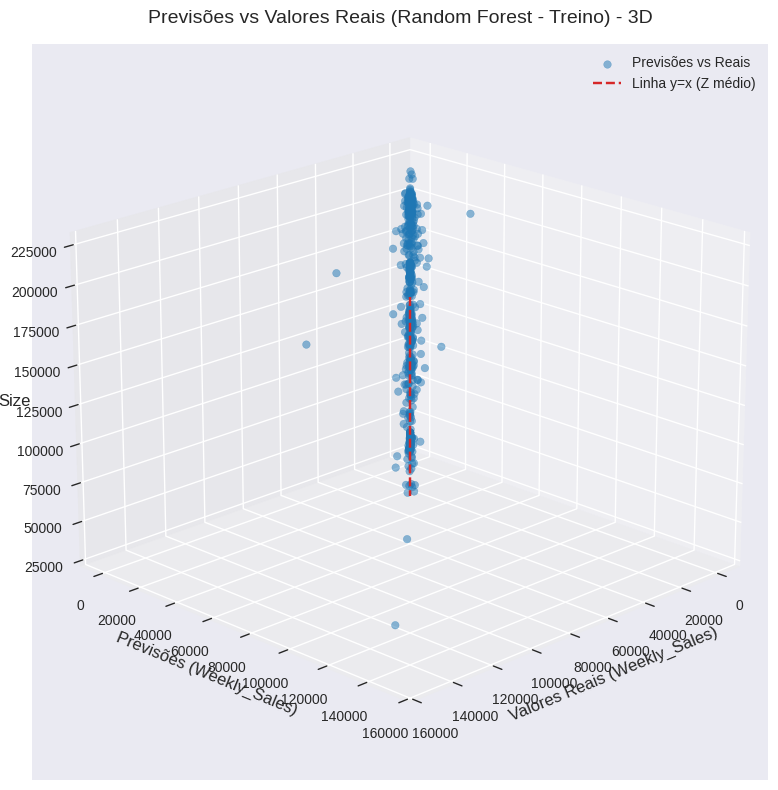

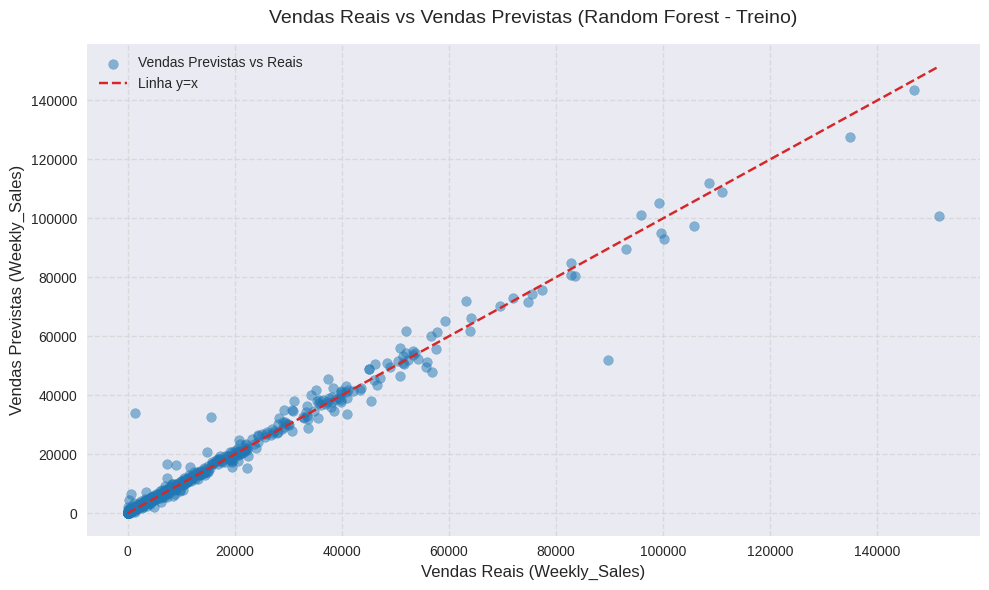

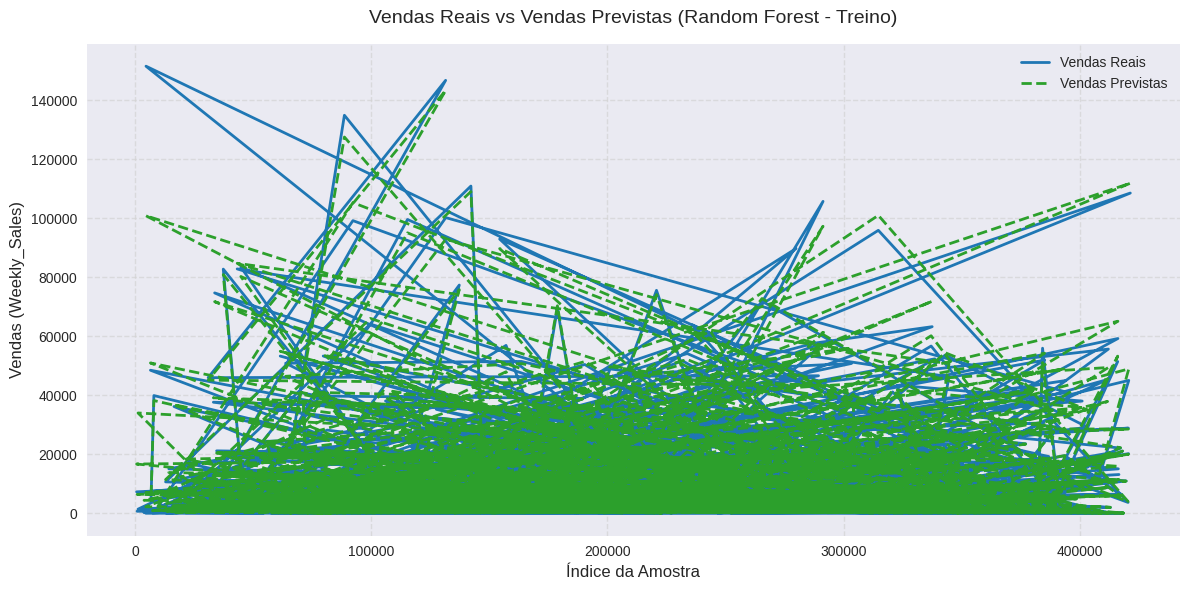

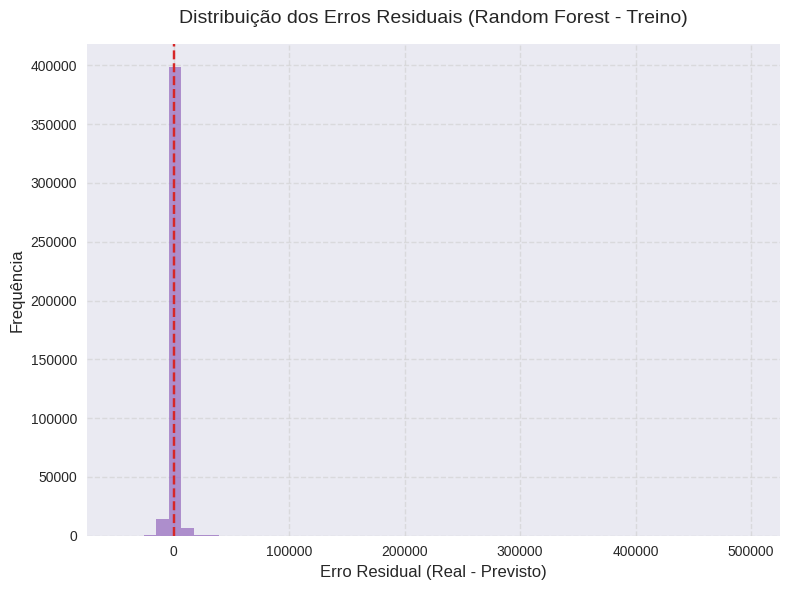

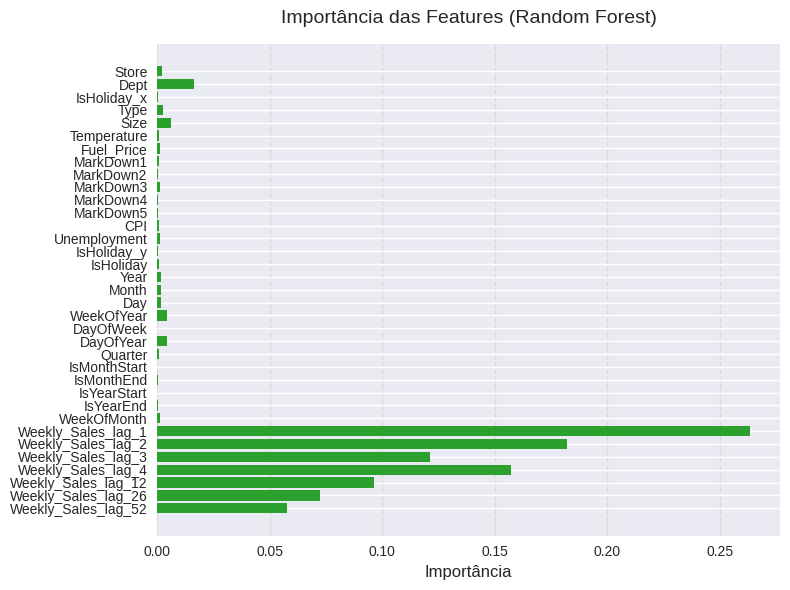

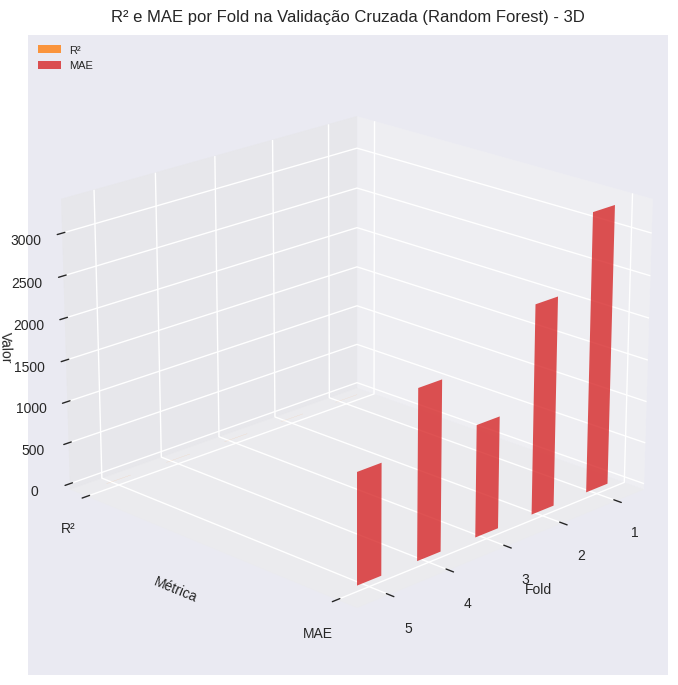

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necessário para gráficos 3D com Matplotlib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

# Verificar e definir estilo
available_styles = plt.style.available
style_to_use = 'seaborn-v0_8' if 'seaborn-v0_8' in available_styles else 'ggplot'
plt.style.use(style_to_use)
print(f"Usando estilo: {style_to_use}")

# Definir paleta de cores moderna e profissional
cores = {
    'azul_principal': '#1F77B4',
    'cinza_referencia': '#D3D3D3',
    'laranja_destaque': '#FF7F0E',
    'vermelho_destaque': '#D62728',
    'roxo_secundario': '#9467BD',
    'verde_secundario': '#2CA02C'
}

# Verificar e criar/treinar o modelo, se necessário
if 'final_model' not in globals() or 'X_full_train' not in globals() or 'y_full_train' not in globals():
    print("ERRO: final_model, X_full_train ou y_full_train não estão definidos. Criando e treinando um modelo básico...")
    # Definir hiperparâmetros baseados nos usados anteriormente
    final_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=10,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )
    # Treinar o modelo (substitua X_full_train e y_full_train pelos seus dados reais, se disponíveis)
    if 'X_full_train' in globals() and 'y_full_train' in globals():
        final_model.fit(X_full_train, y_full_train)
        print("Modelo treinado com sucesso.")
    else:
        print("ERRO: X_full_train ou y_full_train não estão disponíveis. Carregue os dados e treine o modelo antes.")
else:
    print("Usando final_model, X_full_train e y_full_train do ambiente.")

# Calcular previsões no treino
y_pred_train = final_model.predict(X_full_train)

# Amostrar 500 pontos para o gráfico de previsões vs reais (reduzido para evitar sobreposição)
sample_size = min(500, len(y_full_train))
indices = np.random.choice(len(y_full_train), sample_size, replace=False)
y_true_sample = y_full_train.iloc[indices].values
y_pred_sample = y_pred_train[indices]

# Selecionar uma terceira dimensão para o gráfico 3D (ex.: Size, se disponível)
if 'Size' in X_full_train.columns:
    z_sample = X_full_train['Size'].iloc[indices].values
    z_label = 'Size'
elif 'Weekly_Sales_lag_1' in X_full_train.columns:
    z_sample = X_full_train['Weekly_Sales_lag_1'].iloc[indices].values
    z_label = 'Weekly_Sales_lag_1'
else:
    print("ERRO: Nem 'Size' nem 'Weekly_Sales_lag_1' encontrados. Usando erro residual como eixo Z.")
    z_sample = y_true_sample - y_pred_sample
    z_label = 'Erro Residual (Real - Previsto)'

# Calcular erros residuais
residuals = y_full_train - y_pred_train

# Usar as variáveis de validação cruzada já calculadas (assumindo que existem)
if 'cv_scores_r2' not in globals() or 'cv_scores_mae' not in globals():
    print("ERRO: As variáveis cv_scores_r2 ou cv_scores_mae não estão definidas. Execute a validação cruzada primeiro.")
    cv_scores_r2 = []
    cv_scores_mae = []
else:
    print("Usando cv_scores_r2 e cv_scores_mae do ambiente.")

# Importância das features (assumindo que foi calculada anteriormente)
if 'importancias' not in globals():
    print("ERRO: A variável importancias não está definida. Calculando a partir do modelo...")
    importancias = pd.DataFrame({
        'Feature': X_full_train.columns,
        'Importância': final_model.feature_importances_
    }).sort_values(by='Importância', ascending=False).head(10)
else:
    print("Usando importancias do ambiente.")

# 1. Gráfico de Previsões vs Valores Reais (em 3D)
fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')
scatter = ax1.scatter(y_true_sample, y_pred_sample, z_sample, c=cores['azul_principal'], s=30, alpha=0.5, label='Previsões vs Reais')
z_mean = np.mean(z_sample)
x_range = np.array([min(y_true_sample), max(y_true_sample)])
ax1.plot(x_range, x_range, [z_mean, z_mean], color=cores['vermelho_destaque'], linestyle='--', label='Linha y=x (Z médio)')
ax1.set_xlabel('Valores Reais (Weekly_Sales)', fontsize=12)
ax1.set_ylabel('Previsões (Weekly_Sales)', fontsize=12)
ax1.set_zlabel(z_label, fontsize=12)
ax1.set_title('Previsões vs Valores Reais (Random Forest - Treino) - 3D', fontsize=14, pad=15)
ax1.view_init(elev=20, azim=45)
ax1.legend(fontsize=10)
plt.tight_layout()
plt.show()

# 1.5 Gráfico: Vendas Reais vs Vendas Previstas (2D)
fig1_5 = plt.figure(figsize=(10, 6))
plt.scatter(y_true_sample, y_pred_sample, color=cores['azul_principal'], alpha=0.5, label='Vendas Previstas vs Reais')
plt.plot([min(y_true_sample), max(y_true_sample)], [min(y_true_sample), max(y_true_sample)],
         color=cores['vermelho_destaque'], linestyle='--', label='Linha y=x')
plt.xlabel('Vendas Reais (Weekly_Sales)', fontsize=12)
plt.ylabel('Vendas Previstas (Weekly_Sales)', fontsize=12)
plt.title('Vendas Reais vs Vendas Previstas (Random Forest - Treino)', fontsize=14, pad=15)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7, color=cores['cinza_referencia'])
plt.tight_layout()
plt.show()

# 1.6 Novo Gráfico: Linha de Vendas Reais vs Vendas Previstas
fig1_6 = plt.figure(figsize=(12, 6))
plt.plot(indices, y_true_sample, color=cores['azul_principal'], label='Vendas Reais', linewidth=2)
plt.plot(indices, y_pred_sample, color=cores['verde_secundario'], label='Vendas Previstas', linewidth=2, linestyle='--')
plt.xlabel('Índice da Amostra', fontsize=12)
plt.ylabel('Vendas (Weekly_Sales)', fontsize=12)
plt.title('Vendas Reais vs Vendas Previstas (Random Forest - Treino)', fontsize=14, pad=15)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7, color=cores['cinza_referencia'])
plt.tight_layout()
plt.show()

# 2. Gráfico de Erros Residuais (mantido em 2D)
fig2 = plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, color=cores['roxo_secundario'], alpha=0.7)
plt.axvline(0, color=cores['vermelho_destaque'], linestyle='--')
plt.xlabel('Erro Residual (Real - Previsto)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição dos Erros Residuais (Random Forest - Treino)', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.7, color=cores['cinza_referencia'])
plt.tight_layout()
plt.show()

# 3. Gráfico de Importância das Features (mantido em 2D)
fig3 = plt.figure(figsize=(8, 6))
plt.barh(importancias['Feature'], importancias['Importância'], color=cores['verde_secundario'])
plt.xlabel('Importância', fontsize=12)
plt.title('Importância das Features (Random Forest)', fontsize=14, pad=15)
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.7, color=cores['cinza_referencia'], axis='x')
plt.tight_layout()
plt.show()

# 4. Gráfico Combinado de R² e MAE por Fold na Validação Cruzada (em 3D)
if len(cv_scores_r2) > 0 and len(cv_scores_mae) > 0:
    fig4 = plt.figure(figsize=(10, 8))
    ax4 = fig4.add_subplot(111, projection='3d')

    # Configurar dados para o gráfico 3D
    folds = np.arange(1, 6)  # Folds 1 a 5
    y_pos_r2 = np.zeros(5)   # Posição Y para R² (0)
    y_pos_mae = np.ones(5)   # Posição Y para MAE (1)
    width = 0.4              # Largura das barras

    # Verificar comprimento dos dados
    if len(cv_scores_r2) != 5 or len(cv_scores_mae) != 5:
        print("ERRO: cv_scores_r2 ou cv_scores_mae não contêm 5 folds. Ajuste os dados de validação cruzada.")
    else:
        # Plotar barras para R²
        ax4.bar(folds, cv_scores_r2, zs=y_pos_r2, zdir='y', width=width, color=cores['laranja_destaque'], alpha=0.8, label='R²')

        # Plotar barras para MAE
        ax4.bar(folds, cv_scores_mae, zs=y_pos_mae, zdir='y', width=width, color=cores['vermelho_destaque'], alpha=0.8, label='MAE')

        # Configurar rótulos e título
        ax4.set_xlabel('Fold', fontsize=10)  # Reduzi a fonte para liberar espaço
        ax4.set_ylabel('Métrica', fontsize=10)
        ax4.set_zlabel('Valor', fontsize=10)
        ax4.set_title('R² e MAE por Fold na Validação Cruzada (Random Forest) - 3D', fontsize=12, pad=10)  # Reduzi a fonte

        # Ajustar ticks no eixo Y (Métrica)
        ax4.set_yticks([0, 1])
        ax4.set_yticklabels(['R²', 'MAE'])

        # Ajustar margens manualmente
        plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

        # Ajustar ângulo de visualização
        ax4.view_init(elev=20, azim=45)

        # Adicionar legenda com posição ajustada
        ax4.legend(fontsize=8, loc='upper left')  # Reduzi a fonte e ajustei a posição

        # Exibir gráfico
        plt.show()
else:
    print("ERRO: cv_scores_r2 ou cv_scores_mae não contêm dados suficientes para plotar o gráfico 3D.")